# TPC-C Multi-Tenant with Distributed PVC and Tuned PostgreSQL 17.5

* data is generated and loaded into databases in a distributed filesystem
* experiments do not use preloaded data

* PostgreSQL uses improved args:
```
# --- Connection & Worker Processes ---
- "-c"
- "max_connections=1500"       # https://www.postgresql.org/docs/current/runtime-config-connection.html#GUC-MAX-CONNECTIONS
- "-c"
- "max_worker_processes=128"   # https://www.postgresql.org/docs/current/runtime-config-resource.html#GUC-MAX-WORKER-PROCESSES
- "-c"
- "max_parallel_workers=64"    # https://www.postgresql.org/docs/current/runtime-config-resource.html#GUC-MAX-PARALLEL-WORKERS
- "-c"
- "max_parallel_workers_per_gather=8"  # https://www.postgresql.org/docs/current/runtime-config-resource.html#GUC-MAX-PARALLEL-WORKERS-PER-GATHER
- "-c"
- "max_parallel_maintenance_workers=8" # https://www.postgresql.org/docs/current/runtime-config-resource.html#GUC-MAX-PARALLEL-MAINTENANCE-WORKERS

# --- Memory Settings ---
- "-c"
- "shared_buffers=256GB"       # https://www.postgresql.org/docs/current/runtime-config-resource.html#GUC-SHARED-BUFFERS
- "-c"
- "effective_cache_size=350GB" # https://www.postgresql.org/docs/current/runtime-config-query.html#GUC-EFFECTIVE-CACHE-SIZE
- "-c"
- "work_mem=128MB"             # https://www.postgresql.org/docs/current/runtime-config-resource.html#GUC-WORK-MEM
- "-c"
- "maintenance_work_mem=4GB"   # https://www.postgresql.org/docs/current/runtime-config-resource.html#GUC-MAINTENANCE-WORK-MEM
- "-c"
- "temp_buffers=64MB"          # https://www.postgresql.org/docs/current/runtime-config-resource.html#GUC-TEMP-BUFFERS
- "-c"
- "wal_buffers=16MB"           # https://www.postgresql.org/docs/current/runtime-config-wal.html#GUC-WAL-BUFFERS
- "-c"
- "autovacuum_work_mem=1GB"    # https://www.postgresql.org/docs/current/runtime-config-autovacuum.html#GUC-AUTOVACUUM-WORK-MEM

# --- Autovacuum ---
- "-c"
- "autovacuum=on"                            # https://www.postgresql.org/docs/current/runtime-config-autovacuum.html#GUC-AUTOVACUUM
- "-c"
- "autovacuum_max_workers=10"               # https://www.postgresql.org/docs/current/runtime-config-autovacuum.html#GUC-AUTOVACUUM-MAX-WORKERS
- "-c"
- "autovacuum_vacuum_cost_limit=1000"       # https://www.postgresql.org/docs/current/runtime-config-autovacuum.html#GUC-AUTOVACUUM-VACUUM-COST-LIMIT
- "-c"
- "vacuum_cost_limit=1000"                  # https://www.postgresql.org/docs/current/runtime-config-resource.html#GUC-VACUUM-COST-LIMIT
- "-c"
- "autovacuum_naptime=15s"                  # https://www.postgresql.org/docs/current/runtime-config-autovacuum.html#GUC-AUTOVACUUM-NAPTIME
- "-c"
- "autovacuum_vacuum_cost_delay=20ms"       # https://www.postgresql.org/docs/current/runtime-config-autovacuum.html#GUC-AUTOVACUUM-VACUUM-COST-DELAY

# --- WAL & Checkpoints (Ceph-optimized) ---
- "-c"
- "wal_level=replica"                       # https://www.postgresql.org/docs/current/runtime-config-wal.html#GUC-WAL-LEVEL
- "-c"
- "wal_compression=on"                      # https://www.postgresql.org/docs/current/runtime-config-wal.html#GUC-WAL-COMPRESSION
- "-c"
- "wal_writer_delay=500ms"                  # https://www.postgresql.org/docs/current/runtime-config-wal.html#GUC-WAL-WRITER-DELAY
- "-c"
- "commit_delay=10000"                      # https://www.postgresql.org/docs/current/runtime-config-wal.html#GUC-COMMIT-DELAY
- "-c"
- "synchronous_commit=off"                  # https://www.postgresql.org/docs/current/runtime-config-wal.html#GUC-SYNCHRONOUS-COMMIT
- "-c"
- "max_wal_size=2GB"                        # https://www.postgresql.org/docs/current/runtime-config-wal.html#GUC-MAX-WAL-SIZE
- "-c"
- "min_wal_size=1GB"                        # https://www.postgresql.org/docs/current/runtime-config-wal.html#GUC-MIN-WAL-SIZE
- "-c"
- "checkpoint_timeout=15min"                # https://www.postgresql.org/docs/current/runtime-config-wal.html#GUC-CHECKPOINT-TIMEOUT
- "-c"
- "checkpoint_completion_target=0.9"        # https://www.postgresql.org/docs/current/runtime-config-wal.html#GUC-CHECKPOINT-COMPLETION-TARGET

# --- Planner Cost Tweaks (CephFS) ---
- "-c"
- "random_page_cost=4.0"                    # https://www.postgresql.org/docs/current/runtime-config-query.html#GUC-RANDOM-PAGE-COST
- "-c"
- "seq_page_cost=1.5"                       # https://www.postgresql.org/docs/current/runtime-config-query.html#GUC-SEQ-PAGE-COST
- "-c"
- "cpu_tuple_cost=0.01"                     # https://www.postgresql.org/docs/current/runtime-config-query.html#GUC-CPU-TUPLE-COST
- "-c"
- "effective_io_concurrency=2"              # https://www.postgresql.org/docs/current/runtime-config-resource.html#GUC-EFFECTIVE-IO-CONCURRENCY
- "-c"
- "default_statistics_target=500"           # https://www.postgresql.org/docs/current/runtime-config-query.html#GUC-DEFAULT-STATISTICS-TARGET

# --- Locks and Limits ---
- "-c"
- "max_locks_per_transaction=128"           # https://www.postgresql.org/docs/current/runtime-config-locks.html#GUC-MAX-LOCKS-PER-TRANSACTION
- "-c"
- "max_pred_locks_per_transaction=128"      # https://www.postgresql.org/docs/current/runtime-config-locks.html#GUC-MAX-PRED-LOCKS-PER-TRANSACTION
- "-c"
- "max_stack_depth=7MB"                     # https://www.postgresql.org/docs/current/runtime-config-resource.html#GUC-MAX-STACK-DEPTH
- "-c"
- "max_files_per_process=4000"              # https://www.postgresql.org/docs/current/runtime-config-resource.html#GUC-MAX-FILES-PER-PROCESS

# --- Miscellaneous ---
- "-c"
- "huge_pages=try"                          # https://www.postgresql.org/docs/current/runtime-config-resource.html#GUC-HUGE-PAGES
```

In [1]:
import pandas as pd
pd.set_option("display.max_rows", None)
pd.set_option('display.max_colwidth', None)
#import os
#import re
import matplotlib.pyplot as plt
#import pickle
from IPython.display import display, Markdown
import seaborn as sns
from math import floor
import ast
import json
import re
import numpy as np

#import dbmsbenchmarker
#import bexhoma
from bexhoma import evaluators

%matplotlib inline

In [2]:
path = r"C:\data\benchmarks"
#path = r"/home/perdelt/benchmarks"
filename_prefix = "pvc_args_metrics_"

In [55]:
def get_workload(code):
    with open(path+"/"+code+"/queries.config",'r') as inp:
        workload_properties = ast.literal_eval(inp.read())
        return workload_properties


def get_performance_single(evaluation):
    df = evaluation.get_df_benchmarking()
    df = df.sort_values(['experiment_run', 'client'])
    return df

def get_performance(evaluation):
    df = evaluation.get_df_benchmarking()
    df = df.sort_values(['experiment_run', 'client'])
    result = df.groupby('client').agg({
        'Goodput (requests/second)': 'sum',
        'num_errors': 'sum',
        'Latency Distribution.Average Latency (microseconds)': 'mean',
        'Latency Distribution.99th Percentile Latency (microseconds)': 'max',
    }).reset_index()
    return result

def get_performance_all(codes):
    df_performance = pd.DataFrame()
    for code in codes:
        evaluation = evaluators.benchbase(code=code, path=path)
        workload = get_workload(code)
        df = get_performance(evaluation)
        df['type']=workload['tenant_per']
        df['num_tenants']=workload['num_tenants']
        #print(df)
        df_performance = pd.concat([df_performance, df])
    return df_performance

def get_performance_all_single(codes):
    df_performance = pd.DataFrame()
    for code in codes:
        evaluation = evaluators.benchbase(code=code, path=path)
        workload = get_workload(code)
        df = get_performance_single(evaluation)
        df['type']=workload['tenant_per']
        df['num_tenants']=workload['num_tenants']
        #print(df)
        df_performance = pd.concat([df_performance, df])
    return df_performance

def get_metrics(evaluation):
    with open(path+"/"+evaluation.code+"/connections.config",'r') as inf:
        connections = ast.literal_eval(inf.read())
        pretty_connections = json.dumps(connections, indent=2)
        #print(pretty_connections)
        connections_sorted = sorted(connections, key=lambda c: c['name'])
        result = dict()
        for c in connections_sorted:
            #print(c)
            for m, metric in c['monitoring']['metrics'].items():
                if m in result:
                    continue
                result[m] = {
                    'title': metric['title'],
                    'active': metric['active'] if 'active' in metric else 'True',
                    'type': metric['type'] if 'type' in metric else 'cluster',
                    'metric': metric['metric'] if 'metric' in metric else '',
                }
            #result[c['name']] = {
            #    'metrics': c['monitoring']['metrics'],
            #}
            #result[c['parameter']['connection_parameter']['loading_parameters']['BENCHBASE_TERMINALS']] = c['timeIngesting']
        df = pd.DataFrame(result).T
        return df#df['time_load'].max()

def get_loading_time_max(evaluation):
    with open(path+"/"+evaluation.code+"/connections.config",'r') as inf:
        connections = ast.literal_eval(inf.read())
        pretty_connections = json.dumps(connections, indent=2)
        #print(pretty_connections)
        connections_sorted = sorted(connections, key=lambda c: c['name'])
        result = dict()
        for c in connections_sorted:
            #print(c)
            result[c['name']] = {
                'time_load': c['timeLoad'],
                'time_ingest': c['timeIngesting'],
                'time_check': c['timeIndex'],
                'terminals': c['parameter']['connection_parameter']['loading_parameters']['BENCHBASE_TERMINALS'],
                #'target': c['parameter']['connection_parameter']['loading_parameters']['BENCHBASE_TARGET'],
                'pods': c['parameter']['parallelism'],
                'tenant': c['parameter']['TENANT'] if 'TENANT' in c['parameter'] else '',
                'client': c['parameter']['client'],
                'datadisk': c['hostsystem']['datadisk'],
            }
            #result[c['parameter']['connection_parameter']['loading_parameters']['BENCHBASE_TERMINALS']] = c['timeIngesting']
        df = pd.DataFrame(result).T
        return df#df['time_load'].max()

def get_loading_time_max_all(codes):
    df_performance = pd.DataFrame()
    for code in codes:
        evaluation = evaluators.benchbase(code=code, path=path)
        workload = get_workload(code)
        df = get_loading_time_max(evaluation)
        df['type']=workload['tenant_per']
        df['num_tenants']=workload['num_tenants']
        #print(df)
        df_performance = pd.concat([df_performance, df])
    return df_performance

def show_summary_monitoring_table(evaluate, component):
    df_metrics = get_metrics(evaluate) # not used by now
    #print(df_metrics)
    df_monitoring = list()
    ##########
    df = evaluate.get_monitoring_metric(metric='total_cpu_util_s', component=component)
    df = df.max().sort_index() - df.min().sort_index() # compute difference of counter
    #df = df.T.max().sort_index() - df.T.min().sort_index() # compute difference of counter
    df_cleaned = pd.DataFrame(df)
    df_cleaned.columns = ["CPU [CPUs]"]
    if not df_cleaned.empty:
        df_monitoring.append(df_cleaned.copy())
    ##########
    df = evaluate.get_monitoring_metric(metric='total_cpu_throttled', component=component)
    df = df.max().sort_index()
    df_cleaned = pd.DataFrame(df)
    df_cleaned.columns = ["CPU Throttled"]
    if not df_cleaned.empty:
        df_monitoring.append(df_cleaned.copy())
    ##########
    df = evaluate.get_monitoring_metric(metric='total_cpu_util', component=component)
    df = df.max().sort_index()
    df_cleaned = pd.DataFrame(df)
    df_cleaned.columns = ["Max CPU"]
    print(df_cleaned)
    if not df_cleaned.empty:
        df_monitoring.append(df_cleaned.copy())
    ##########
    df = evaluate.get_monitoring_metric(metric='total_cpu_memory', component=component)/1024
    #df = evaluate.get_loading_metrics('total_cpu_memory')/1024
    df = df.max().sort_index()
    df_cleaned = pd.DataFrame(df).round(2)
    df_cleaned.columns = ["Max RAM [Gb]"]
    if not df_cleaned.empty:
        df_monitoring.append(df_cleaned.copy())
    ##########
    df = evaluate.get_monitoring_metric(metric='total_cpu_memory_cached', component=component)/1024
    #df = evaluate.get_loading_metrics('total_cpu_memory_cached')/1024
    df = df.max().sort_index()
    df_cleaned = pd.DataFrame(df)
    df_cleaned.columns = ["Max RAM Cached [Gb]"]
    if not df_cleaned.empty:
        df_monitoring.append(df_cleaned.copy())
    ##########
    df = evaluate.get_monitoring_metric(metric='pg_locks_count', component=component)#/1024
    #df = evaluate.get_loading_metrics('total_cpu_memory_cached')/1024
    df = df.mean().sort_index()
    df_cleaned = pd.DataFrame(df)
    df_cleaned.columns = ["Locks"]
    if not df_cleaned.empty:
        df_monitoring.append(df_cleaned.copy())
    ##########
    df = evaluate.get_monitoring_metric(metric='pg_stat_activity_count_active', component=component)#/1024
    #df = evaluate.get_loading_metrics('total_cpu_memory_cached')/1024
    df = df.mean().sort_index()
    df_cleaned = pd.DataFrame(df)
    df_cleaned.columns = ["Active"]
    if not df_cleaned.empty:
        df_monitoring.append(df_cleaned.copy())
    ##########
    df = evaluate.get_monitoring_metric(metric='pg_stat_activity_count_idle', component=component)#/1024
    #df = evaluate.get_loading_metrics('total_cpu_memory_cached')/1024
    df = df.mean().sort_index()
    df_cleaned = pd.DataFrame(df)
    df_cleaned.columns = ["Idle"]
    #if not df_cleaned.empty:
    df_monitoring.append(df_cleaned.copy())
    ##########
    df = evaluate.get_monitoring_metric(metric='pg_stat_activity_count_idle_transaction', component=component)#/1024
    #df = evaluate.get_loading_metrics('total_cpu_memory_cached')/1024
    df = df.mean().sort_index()
    df_cleaned = pd.DataFrame(df)
    df_cleaned.columns = ["Transactions Idle"]
    #if not df_cleaned.empty:
    df_monitoring.append(df_cleaned.copy())
    ##########
    df = evaluate.get_monitoring_metric(metric='pg_stat_activity_count_idle_transaction_aborted', component=component)#/1024
    #df = evaluate.get_loading_metrics('total_cpu_memory_cached')/1024
    df = df.max().sort_index()
    df_cleaned = pd.DataFrame(df)
    df_cleaned.columns = ["Transactions Aborted"]
    #if not df_cleaned.empty:
    df_monitoring.append(df_cleaned.copy())
    ##########
    df = evaluate.get_monitoring_metric(metric='pg_stat_database_blks_hit', component=component)#/1024
    #df = evaluate.get_loading_metrics('total_cpu_memory_cached')/1024
    df = df.max().sort_index() - df.min().sort_index() # compute difference of counter
    df_cleaned = pd.DataFrame(df)
    df_cleaned.columns = ["Block Hits"]
    #if not df_cleaned.empty:
    df_monitoring.append(df_cleaned.copy())
    ##########
    df = evaluate.get_monitoring_metric(metric='pg_stat_database_blks_read', component=component)#/1024
    #df = evaluate.get_loading_metrics('total_cpu_memory_cached')/1024
    df = df.max().sort_index() - df.min().sort_index() # compute difference of counter
    df_cleaned = pd.DataFrame(df)
    df_cleaned.columns = ["Block Reads"]
    #if not df_cleaned.empty:
    df_monitoring.append(df_cleaned.copy())
    ##########
    df = evaluate.get_monitoring_metric(metric='pg_statio_user_tables_heap_blocks_read', component=component)#/1024
    #df = evaluate.get_loading_metrics('total_cpu_memory_cached')/1024
    df = df.max().sort_index() - df.min().sort_index() # compute difference of counter
    df_cleaned = pd.DataFrame(df)
    df_cleaned.columns = ["Heap Reads"]
    #print(df_cleaned)
    #if not df_cleaned.empty:
    df_monitoring.append(df_cleaned.copy())
    ##########
    df = evaluate.get_monitoring_metric(metric='pg_statio_user_tables_heap_blocks_hit', component=component)#/1024
    #df = evaluate.get_loading_metrics('total_cpu_memory_cached')/1024
    df = df.max().sort_index() - df.min().sort_index() # compute difference of counter
    df_cleaned = pd.DataFrame(df)
    df_cleaned.columns = ["Heap Hits"]
    #print(df_cleaned)
    #if not df_cleaned.empty:
    df_monitoring.append(df_cleaned.copy())
    ##########
    df = evaluate.get_monitoring_metric(metric='pg_stat_bgwriter_checkpoint_sync_time_total', component=component)#/1024
    #df = evaluate.get_loading_metrics('total_cpu_memory_cached')/1024
    df = df.max().sort_index() - df.min().sort_index() # compute difference of counter
    df_cleaned = pd.DataFrame(df)
    df_cleaned.columns = ["Sync Time"]
    #if not df_cleaned.empty:
    df_monitoring.append(df_cleaned.copy())
    ##########
    df = evaluate.get_monitoring_metric(metric='pg_stat_bgwriter_checkpoint_write_time_total', component=component)#/1024
    #df = evaluate.get_loading_metrics('total_cpu_memory_cached')/1024
    df = df.max().sort_index() - df.min().sort_index() # compute difference of counter
    df_cleaned = pd.DataFrame(df)
    df_cleaned.columns = ["Write Time"]
    #if not df_cleaned.empty:
    df_monitoring.append(df_cleaned.copy())
    ##########
    df = evaluate.get_monitoring_metric(metric='cache_hit_ratio', component=component)*100.
    #df = evaluate.get_loading_metrics('total_cpu_memory_cached')/1024
    df = df.mean().sort_index()
    df_cleaned = pd.DataFrame(df)
    df_cleaned.columns = ["Cache Hit Ratio [%]"]
    #if not df_cleaned.empty:
    df_monitoring.append(df_cleaned.copy())
    ##########
    df = evaluate.get_monitoring_metric(metric='pg_stat_user_tables_autoanalyze_count', component=component)*100.
    #df = evaluate.get_loading_metrics('total_cpu_memory_cached')/1024
    df = df.max().sort_index() - df.min().sort_index() # compute difference of counter
    df_cleaned = pd.DataFrame(df)
    df_cleaned.columns = ["Number Autoanalyze"]
    #if not df_cleaned.empty:
    df_monitoring.append(df_cleaned.copy())
    ##########
    df = evaluate.get_monitoring_metric(metric='pg_stat_user_tables_autovacuum_count', component=component)*100.
    #df = evaluate.get_loading_metrics('total_cpu_memory_cached')/1024
    df = df.max().sort_index() - df.min().sort_index() # compute difference of counter
    df_cleaned = pd.DataFrame(df)
    df_cleaned.columns = ["Number Autovacuum"]
    #if not df_cleaned.empty:
    df_monitoring.append(df_cleaned.copy())
    return df_monitoring


def get_monitoring_timeseries_single(code, metric='pg_locks_count', component="stream"):
    evaluate = evaluators.benchbase(code=code, path=path)
    df = evaluate.get_monitoring_metric(metric=metric, component=component)#/1024
    #df = evaluate.get_loading_metrics('total_cpu_memory_cached')/1024
    #df = df.mean().sort_index()
    #df_cleaned = pd.DataFrame(df)
    #df_cleaned.columns = ["Locks"]
    return df#_cleaned


def get_monitoring_stream_single(evaluation):
    df_monitoring = show_summary_monitoring_table(evaluation, "stream")
    if len(df_monitoring) > 0:
        #print("\n### Stream SUT")
        df = pd.concat(df_monitoring, axis=1).round(2)
        df = df.reindex(index=evaluators.natural_sort(df.index))
        # If your DataFrame is named df and the index is a string like 'PostgreSQL-1-1-1024-0-1'
        df = df.copy()  # avoid modifying original
        df['client'] = df.index.str.rsplit('-', n=1).str[-1]
        #print(df)
        return df

def get_monitoring(evaluation, type="stream"):
    df_monitoring = show_summary_monitoring_table(evaluation, type)
    if len(df_monitoring) > 0:
        #print("\n### Stream SUT")
        df = pd.concat(df_monitoring, axis=1).round(2)
        df = df.reindex(index=evaluators.natural_sort(df.index))
        # If your DataFrame is named df and the index is a string like 'PostgreSQL-1-1-1024-0-1'
        df = df.copy()  # avoid modifying original
        df['client'] = df.index.str.rsplit('-', n=1).str[-1]
        #print(df)
        result = df.groupby('client').agg({
            'CPU [CPUs]': 'sum',
            'Max RAM [Gb]': 'sum',
            'Max RAM Cached [Gb]': 'sum',
            'Max CPU': 'sum',
            'CPU Throttled': 'sum',
            'Locks': 'sum',
            'Active': 'sum',
            'Idle': 'sum',
            'Transactions Idle': 'sum',
            'Transactions Aborted': 'sum',
            'Block Hits': 'sum',
            'Block Reads': 'sum',
            'Heap Reads': 'sum',
            'Heap Hits': 'sum',
            'Sync Time': 'sum',
            'Write Time': 'sum',
            'Number Autoanalyze': 'sum',
            'Number Autovacuum': 'sum',
            'Cache Hit Ratio [%]': 'mean',
        }).reset_index()
        return result

def get_monitoring_stream(evaluation):
    return get_monitoring(evaluation, type="stream")

def get_monitoring_all(codes, type="stream"):
    df_performance = pd.DataFrame()
    for code in codes:
        evaluation = evaluators.benchbase(code=code, path=path)
        workload = get_workload(code)
        df = get_monitoring(evaluation, type)
        df['type']=workload['tenant_per']
        df['num_tenants']=workload['num_tenants']
        #print(df)
        df_performance = pd.concat([df_performance, df])
    return df_performance

def get_monitoring_stream_all(codes):
    return get_monitoring_all(codes, type="stream")


In [4]:
def sanitize_filename(title, max_length=100):
    # Replace non-alphanumeric characters with underscores
    safe = re.sub(r'[^a-zA-Z0-9-_]+', '_', title.strip())
    # Truncate to a safe length
    return safe[:max_length].rstrip('_')
    
def plot_bars(df, y, title, estimator):
    df_plot = df.copy()
    #df_plot = df_plot[df_plot['client']=='1']
    df_plot = df_plot.sort_values(['num_tenants','type'])
    # Hatch styles for each type
    hatch_map = {
        'container': '/',
        'database': '\\',
        'schema': 'x'
    }
    hue_order = ['container', 'database', 'schema']
    # Create the plot
    plt.figure(figsize=(10, 6))
    ax = sns.barplot(
        data=df_plot,
        x='num_tenants',
        y=y,
        hue='type',
        estimator=estimator,
        palette='Set2',
        hue_order=hue_order
    )
    show_height = False
    if show_height:
        for bar in ax.patches:
            height = bar.get_height()
            if height > 0:
                ax.text(
                    bar.get_x() + bar.get_width() / 2,  # X: center of bar
                    height,                             # Y: top of bar
                    f'{height:.1f}',                    # Text (1 decimal place)
                    ha='center', va='bottom', fontsize=8
                )
    # Get tick positions (i.e., the x-axis categories)
    xticks = ax.get_xticks()
    bar_width = ax.patches[0].get_width()
    # Create a mapping from (num_tenants, type) to hatch
    grouped = df_plot.groupby(['num_tenants', 'type']).agg({y: estimator}).reset_index()
    #print(grouped)
    grouped_dict = {(row['num_tenants'], row['type']): hatch_map[row['type']] for _, row in grouped.iterrows()}
    bars = sorted(ax.patches, key=lambda bar: bar.get_x() if bar.get_height() > 0 else 10000)
    for bar, (_, row) in zip(bars, grouped.iterrows()):
        bar.my_id = (row['num_tenants'], row['type'])  # or anything else like an index or uuid
        bar.set_hatch(hatch_map[row['type']]) #grouped_dict[(bar.my_id)])
        bar.set_edgecolor('black')
        bar.set_linewidth(1)
    handles, labels = ax.get_legend_handles_labels()
    for handle, label in zip(handles, labels):
        hatch = hatch_map.get(label, '')
        handle.set_hatch(hatch)
    # Final touches
    plt.legend(title='Type')
    ax.legend(fontsize=18)
    #ax.legend(fontsize=18, loc='upper left', bbox_to_anchor=(1, 1))  # move outside
    plt.title(f"{title}", fontsize=24)
    #plt.title(f"{title} by Number of Tenants and Type", fontsize=24)
    plt.xlabel("Number of Tenants", fontsize=18)
    ax.tick_params(axis='both', labelsize=16)
    # Remove y-axis label
    ax.set_ylabel('')  # or ax.set(ylabel='')
    plt.tight_layout()
    filename = "tpcc_" + filename_prefix + sanitize_filename(title) + ".png"    
    plt.savefig(filename, dpi=300, bbox_inches="tight")
    plt.show()



In [5]:
def plot_boxplots(df, y, title):
    plt.figure(figsize=(10, 6))
    # Hatch styles for each type
    hatch_map = {
        'container': '/',
        'database': '\\',
        'schema': 'x'
    }
    hue_order = ['container', 'database', 'schema']
    
    # Plot boxplots grouped by num_tenants and colored by type
    ax = sns.boxplot(
        data=df,
        x='num_tenants',
        y=y,#'Goodput (requests/second)',
        hue='type',
        palette='Set2'  # consistent colors per type
    )
    # Add vertical separator lines between groups
    # Get the number of unique num_tenants and type
    num_groups = df['num_tenants'].nunique()
    num_types = df['type'].nunique()
    
    # Extract hue order
    hue_order = ax.get_legend_handles_labels()[1]
    num_hue = len(hue_order)
    
    # Get hue order from seaborn (types)
    _, type_order = ax.get_legend_handles_labels()
    num_types = len(type_order)
    
    #print(len(ax.patches))
    # Set hatches correctly: patches are grouped by x then by hue
    for i, patch in enumerate(ax.patches):
        #print(i)
        type_index = i // (num_groups)
        if type_index >= num_types:
            break
        type_name = type_order[type_index]
        patch.set_hatch(hatch_map.get(type_name, ''))
        #print(hatch_map.get(type_name, ''))
        patch.set_edgecolor('black')
        patch.set_linewidth(1)
    
    # Each num_tenants group has num_types boxes
    for i in range(1, num_groups):
        xpos = i - 0.5 #0.5
        ax.axvline(x=xpos, color='gray', linestyle='--', alpha=0.5)
    
    
    # Update legend with matching hatches
    handles, labels = ax.get_legend_handles_labels()
    for handle, label in zip(handles, labels):
        hatch = hatch_map.get(label, '')
        handle.set_hatch(hatch)
        handle.set_edgecolor('black')
        handle.set_linewidth(1)
    
    #title = "Goodput [req/s] Distribution per Tenant"
    plt.title(title, fontsize=24)
    plt.xlabel("Number of Tenants")
    plt.ylabel("")#"Goodput (requests/second)")
    plt.xlabel("Number of Tenants", fontsize=18)
    ax.tick_params(axis='both', labelsize=16)
    plt.legend(title="Type")
    ax.legend(fontsize=18)
    plt.tight_layout()
    filename = "tpcc_" + filename_prefix + sanitize_filename(title) + ".png"    
    plt.savefig(filename, dpi=300, bbox_inches="tight")
    plt.show()

# Results

In [6]:
codes = [
    # container
    '1752619786', #tenants=1
    '1752627114', #tenants=2
    '1752635448', #tenants=3
    #'1752635448', #tenants=4
    '1752654768', #tenants=5
    '1752667374', #tenants=6
    '1752678743', #tenants=7
    #'1752635448', #tenants=8
    #'1752572699', #tenants=9
    #'1752464472', #tenants=10

    # database
    '1752617379', #tenants=1
    '1752624635', #tenants=2
    '1752632755', #tenants=3
    #'1752632755', #tenants=4
    '1752651650', #tenants=5
    '1752663765', #tenants=6
    #'1752632755', #tenants=7
    #'1752632755', #tenants=8
    #'1752568918', #tenants=9
    #'1752464472', #tenants=10

    #schema
    '1752615012', #tenants=1
    '1752622184', #tenants=2
    '1752630091', #tenants=3
    '1752639128', #tenants=4
    '1752648423', #tenants=5
    '1752660317', #tenants=6
    #'1752630091', #tenants=7
    #'1752630091', #tenants=8
    #'1752565302', #tenants=9
    #'1752537927', #tenants=10

]

codes

['1752619786',
 '1752627114',
 '1752635448',
 '1752654768',
 '1752667374',
 '1752678743',
 '1752617379',
 '1752624635',
 '1752632755',
 '1752651650',
 '1752663765',
 '1752615012',
 '1752622184',
 '1752630091',
 '1752639128',
 '1752648423',
 '1752660317']

<Axes: >

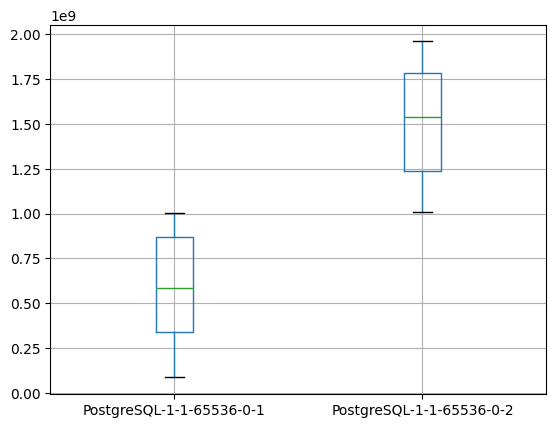

In [7]:
metric = 'pg_stat_database_blks_hit'
#metric = 'pg_stat_database_blks_reads'
#metric = 'pg_stat_activity_count_idle_transaction'
code = codes[0]
df_monitoring = get_monitoring_timeseries_single(code, metric=metric)

#df_monitoring.plot(title=metric)
df_monitoring.boxplot()


<Axes: title={'center': 'pg_stat_activity_count_idle_transaction'}>

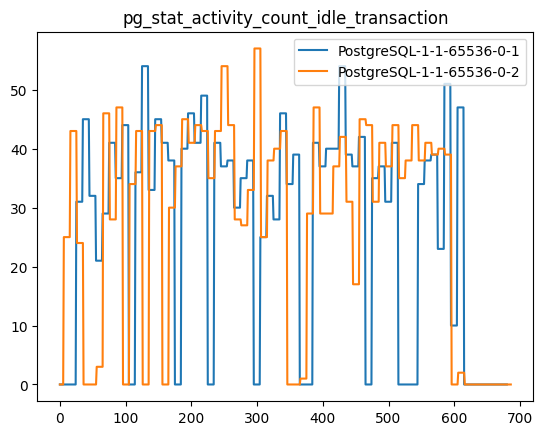

In [8]:
metric = 'pg_stat_database_blks_hit'
metric = 'pg_stat_activity_count_idle_transaction'
code = codes[0]
df_monitoring = get_monitoring_timeseries_single(code, metric=metric)

df_monitoring.plot(title=metric)


In [9]:
df_performance = get_monitoring_all(codes, "stream")
#df_performance = df_performance[df_performance['client'] == '1']
df_performance

                          CPU Throttled
PostgreSQL-1-1-65536-0-1            0.0
PostgreSQL-1-1-65536-0-2            0.0
                          CPU Throttled
PostgreSQL-1-1-65536-0-1            0.0
PostgreSQL-1-1-65536-0-2            0.0
PostgreSQL-1-1-65536-1-1            0.0
PostgreSQL-1-1-65536-1-2            0.0
                          CPU Throttled
PostgreSQL-1-1-65536-0-1            0.0
PostgreSQL-1-1-65536-0-2            0.0
PostgreSQL-1-1-65536-1-1            0.0
PostgreSQL-1-1-65536-1-2            0.0
PostgreSQL-1-1-65536-2-1            0.0
PostgreSQL-1-1-65536-2-2            0.0
                          CPU Throttled
PostgreSQL-1-1-65536-0-1            0.0
PostgreSQL-1-1-65536-0-2            0.0
PostgreSQL-1-1-65536-1-1            0.0
PostgreSQL-1-1-65536-1-2            0.0
PostgreSQL-1-1-65536-2-1            0.0
PostgreSQL-1-1-65536-2-2            0.0
PostgreSQL-1-1-65536-3-1            0.0
PostgreSQL-1-1-65536-3-2            0.0
PostgreSQL-1-1-65536-4-1            0.0


,client,CPU [CPUs],Max RAM [Gb],Max RAM Cached [Gb],Max CPU,CPU Throttled,Locks,Active,Idle,Transactions Idle,...,Block Reads,Heap Reads,Heap Hits,Sync Time,Write Time,Number Autoanalyze,Number Autovacuum,Cache Hit Ratio [%],type,num_tenants
0,1,13055.38,10.21,22.26,23.01,0.0,916.72,62.95,2.36,27.02,...,74.0,55.0,5.009932e+08,0.0,0.0,15700.0,12500.0,100.000000,container,1
1,2,13088.64,13.36,30.16,24.23,0.0,917.70,61.64,1.52,27.76,...,28.0,28.0,5.152539e+08,0.0,0.0,13200.0,10600.0,100.000000,container,1
0,1,21667.81,19.49,37.26,19.56,0.0,1625.58,107.19,3.39,51.13,...,85.0,51.0,7.854570e+08,0.0,0.0,29300.0,23000.0,100.000000,container,2
1,2,22395.01,24.27,50.72,21.06,0.0,1638.79,109.50,2.81,49.08,...,48.0,48.0,8.065245e+08,0.0,0.0,26200.0,20500.0,100.000000,container,2
0,1,25990.50,27.55,50.71,17.15,0.0,2174.83,146.01,5.37,68.27,...,146.0,99.0,8.718086e+08,0.0,0.0,43800.0,33400.0,100.000000,container,3
1,2,26070.12,33.04,62.63,15.64,0.0,2199.91,152.65,4.41,61.50,...,65.0,65.0,9.246232e+08,0.0,0.0,37200.0,29200.0,100.000000,container,3
0,1,27396.32,42.60,68.64,11.58,0.0,1072.04,74.76,2.19,29.30,...,2197.0,104.0,8.263166e+08,0.0,0.0,57500.0,45500.0,43.518000,container,5
1,2,29701.19,48.34,81.50,13.48,0.0,2853.35,191.43,8.38,87.28,...,1206.0,156.0,1.298300e+09,0.0,0.0,88900.0,69700.0,99.590000,container,5
0,1,33454.85,50.95,80.23,10.49,0.0,2921.74,182.73,7.34,104.23,...,701.0,93.0,1.000308e+09,0.0,0.0,82900.0,62400.0,99.886667,container,6
1,2,32525.87,56.94,93.92,10.13,0.0,2922.61,182.27,7.01,97.70,...,608.0,85.0,1.132111e+09,0.0,0.0,85500.0,65100.0,99.890000,container,6


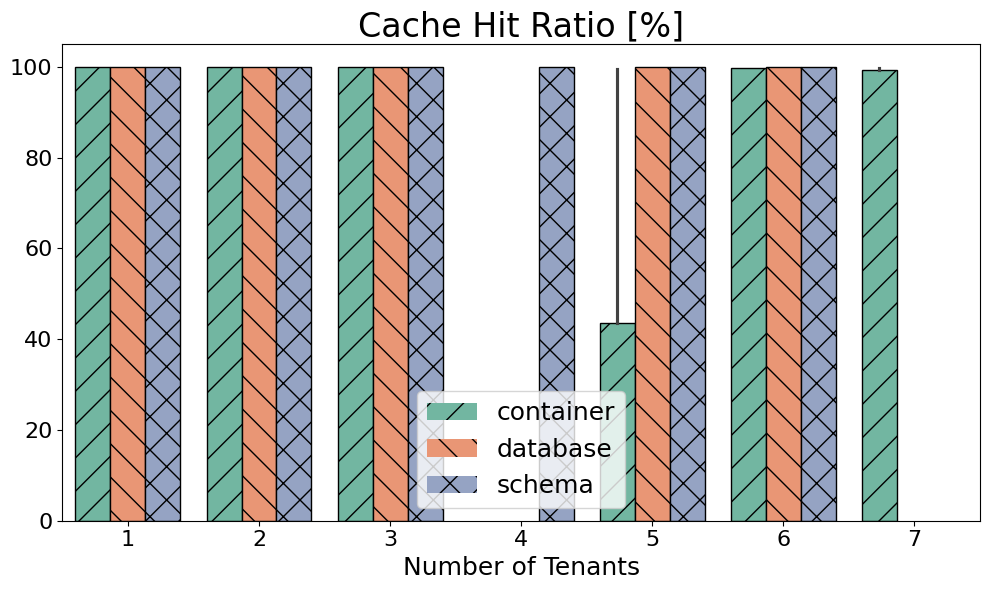

In [10]:
df = df_performance[df_performance['client']=='1']
#df = df_performance.copy()
plot_bars(df_performance.fillna(0), y='Cache Hit Ratio [%]', title='Cache Hit Ratio [%]', estimator='min')
#plot_boxplots(df, y='Block Hits', title='Block Hits')

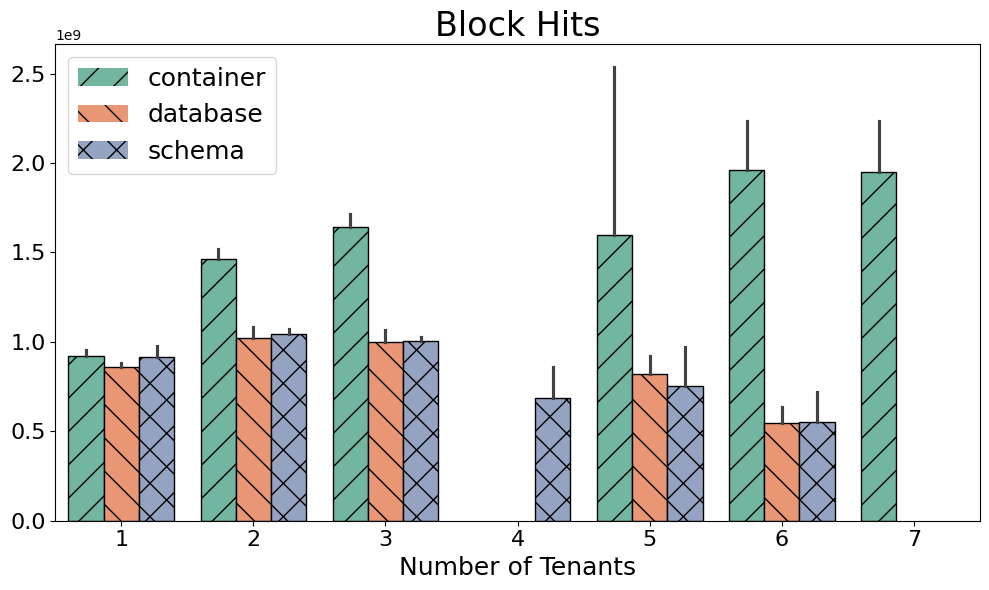

In [11]:
df = df_performance[df_performance['client']=='1']
#df = df_performance.copy()
plot_bars(df_performance, y='Block Hits', title='Block Hits', estimator='min')
#plot_boxplots(df, y='Block Hits', title='Block Hits')

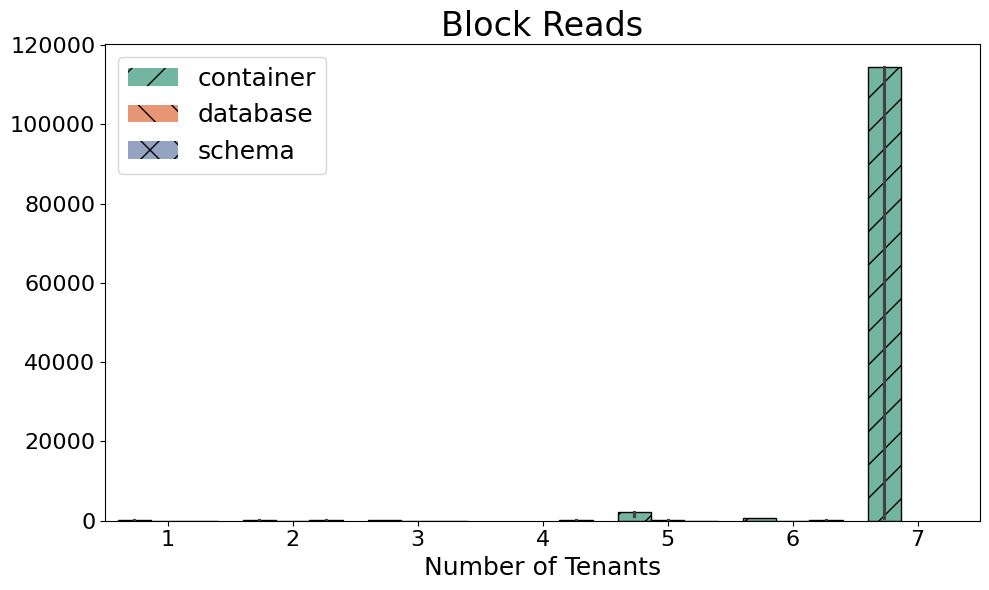

In [12]:
df = df_performance[df_performance['client']=='1']
#df = df_performance.copy()
#plot_boxplots(df, y='Block Reads', title='Block Reads')
plot_bars(df_performance, y='Block Reads', title='Block Reads', estimator='max')

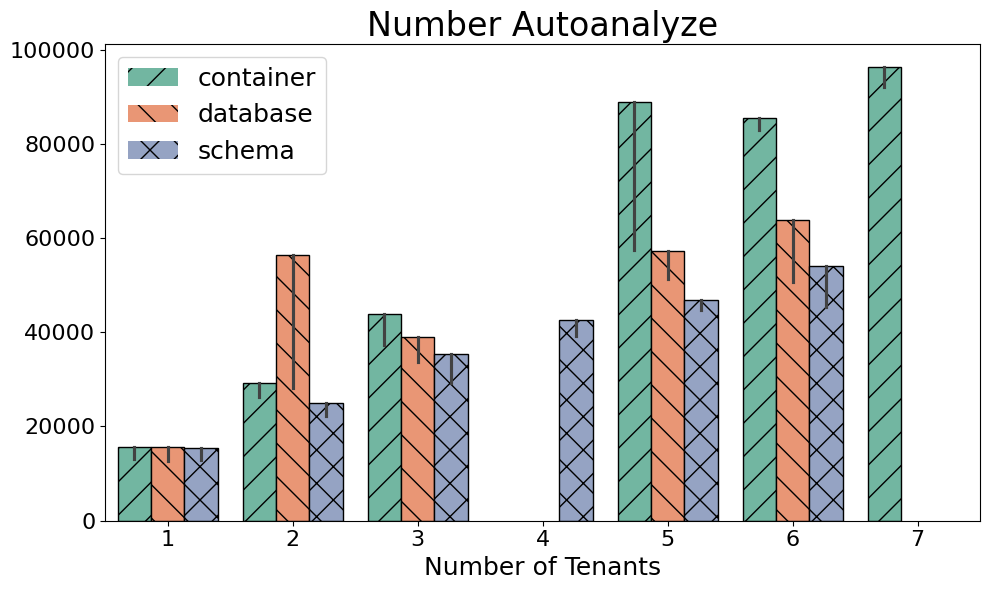

In [13]:
df = df_performance[df_performance['client']=='1']
#df = df_performance.copy()
plot_bars(df_performance, y='Number Autoanalyze', title='Number Autoanalyze', estimator='max')
#plot_boxplots(df, y='Block Hits', title='Block Hits')

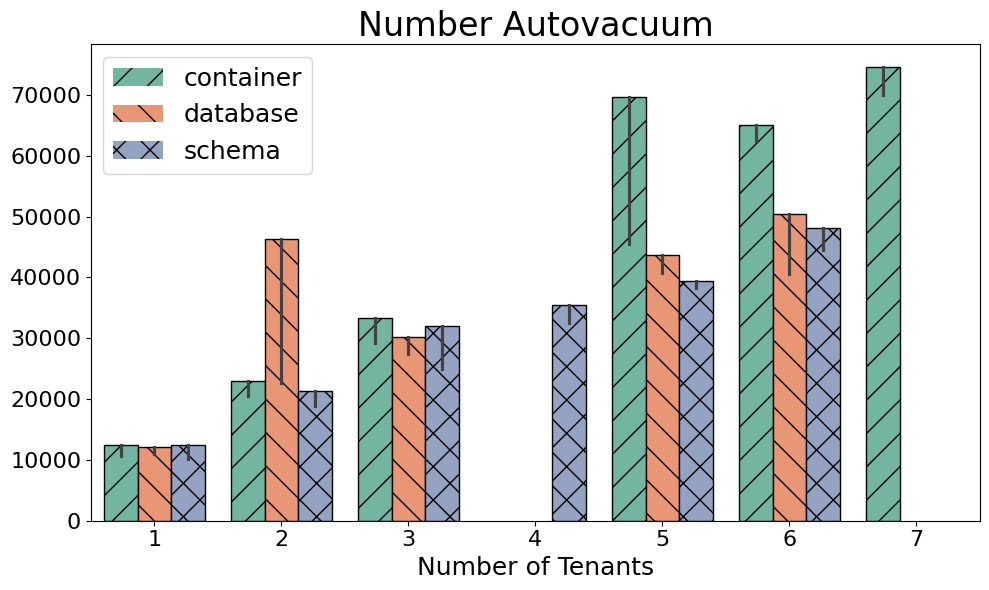

In [14]:
df = df_performance[df_performance['client']=='1']
#df = df_performance.copy()
plot_bars(df_performance, y='Number Autovacuum', title='Number Autovacuum', estimator='max')
#plot_boxplots(df, y='Block Hits', title='Block Hits')

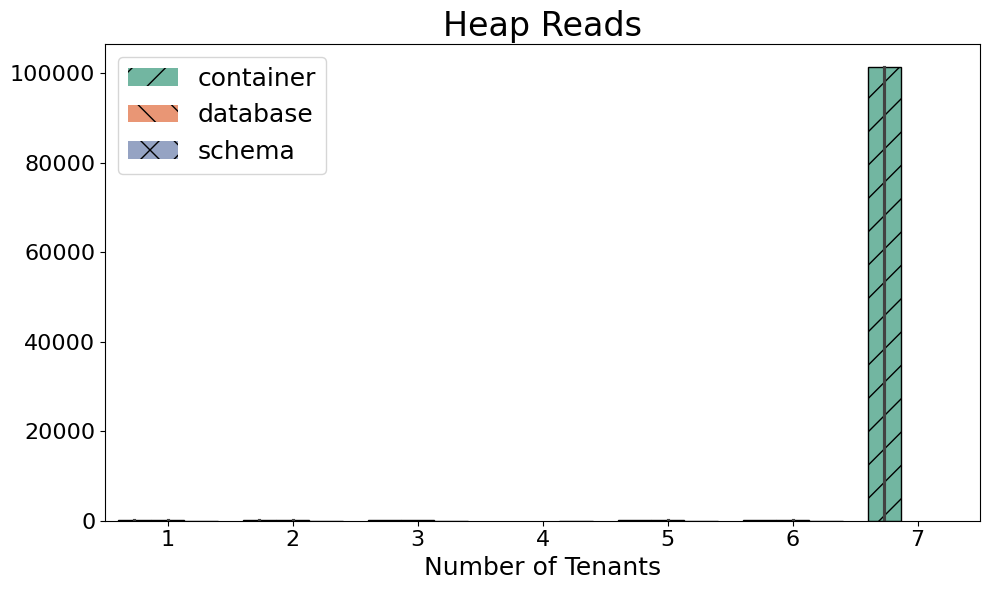

In [15]:
df = df_performance[df_performance['client']=='1']
#df = df_performance.copy()
#plot_boxplots(df, y='Heap Reads', title='Heap Reads')
plot_bars(df_performance, y='Heap Reads', title='Heap Reads', estimator='max')

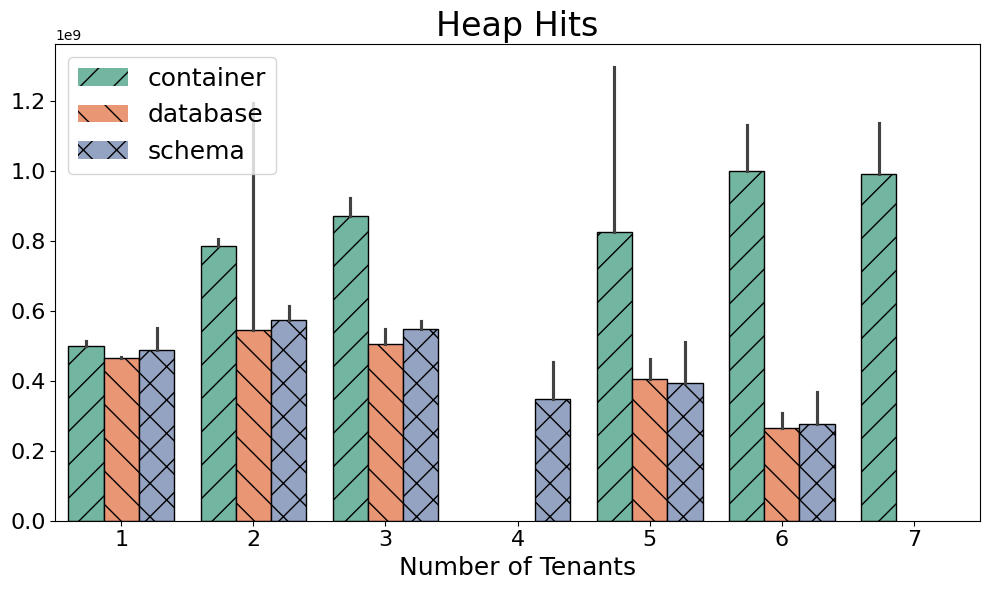

In [16]:
df = df_performance[df_performance['client']=='1']
#df = df_performance.copy()
#plot_boxplots(df, y='Heap Reads', title='Heap Reads')
plot_bars(df_performance, y='Heap Hits', title='Heap Hits', estimator='min')

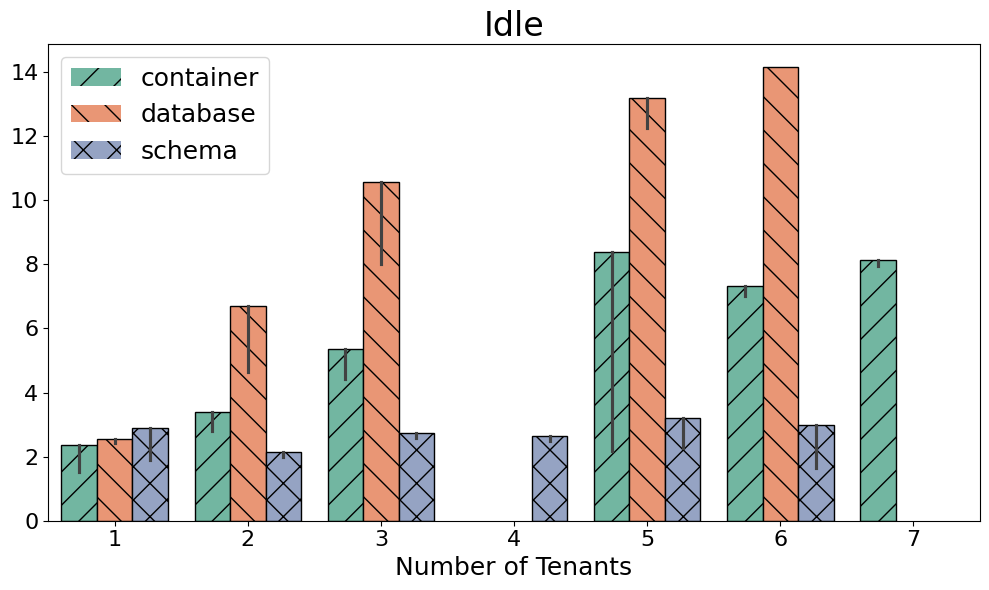

In [17]:
df = df_performance[df_performance['client']=='1']
#df = df_performance.copy()
#plot_boxplots(df, y='Idle', title='Idle')
plot_bars(df_performance, y='Idle', title='Idle', estimator='max')

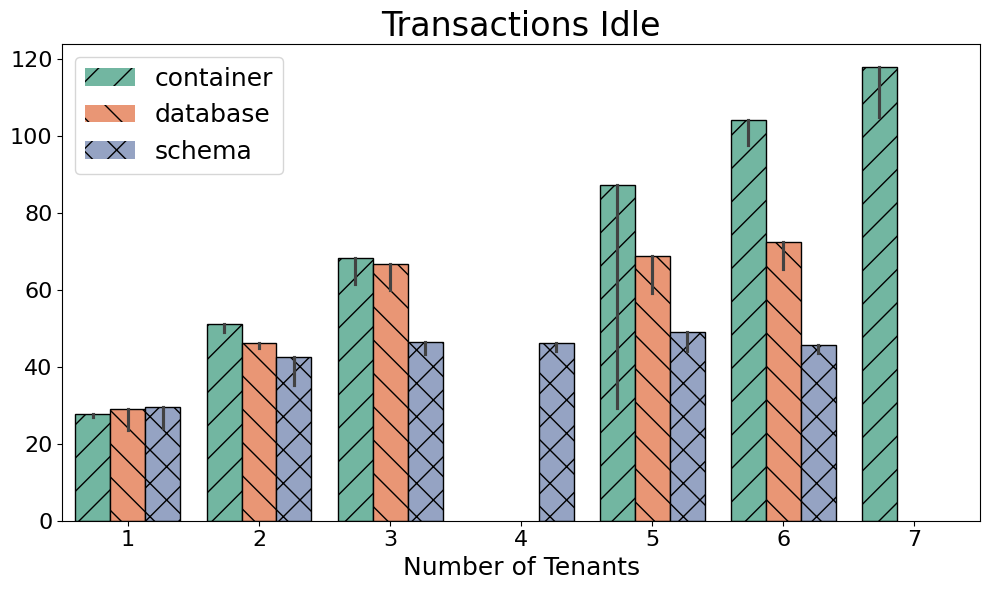

In [18]:
df = df_performance[df_performance['client']=='1']
#df = df_performance.copy()
#plot_boxplots(df, y='Transactions Idle', title='Transactions Idle')
plot_bars(df_performance, y='Transactions Idle', title='Transactions Idle', estimator='max')

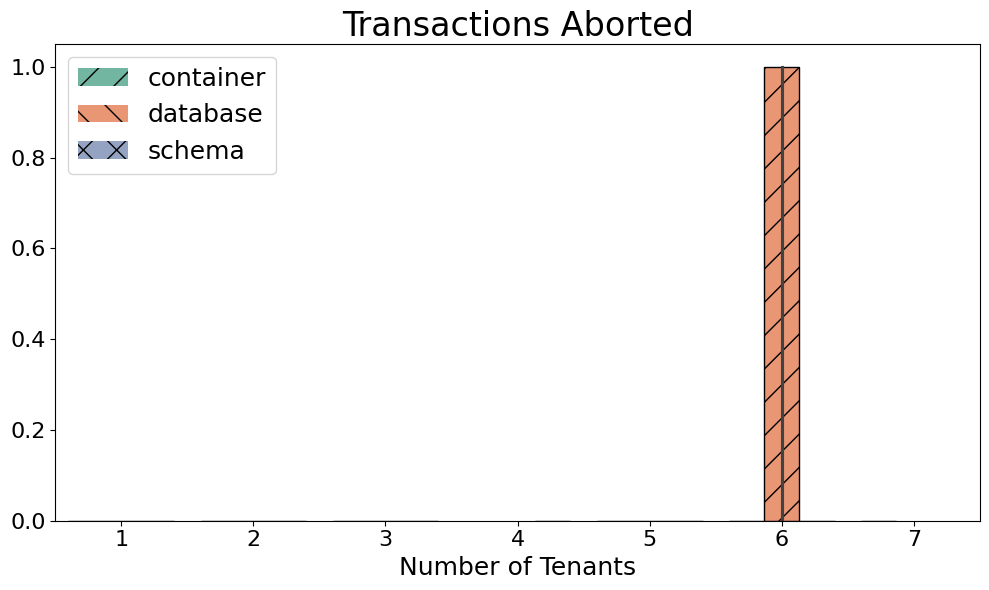

In [19]:
df = df_performance[df_performance['client']=='1']
#df = df_performance.copy()
#plot_boxplots(df, y='Transactions Aborted', title='Transactions Aborted')
plot_bars(df_performance, y='Transactions Aborted', title='Transactions Aborted', estimator='max')

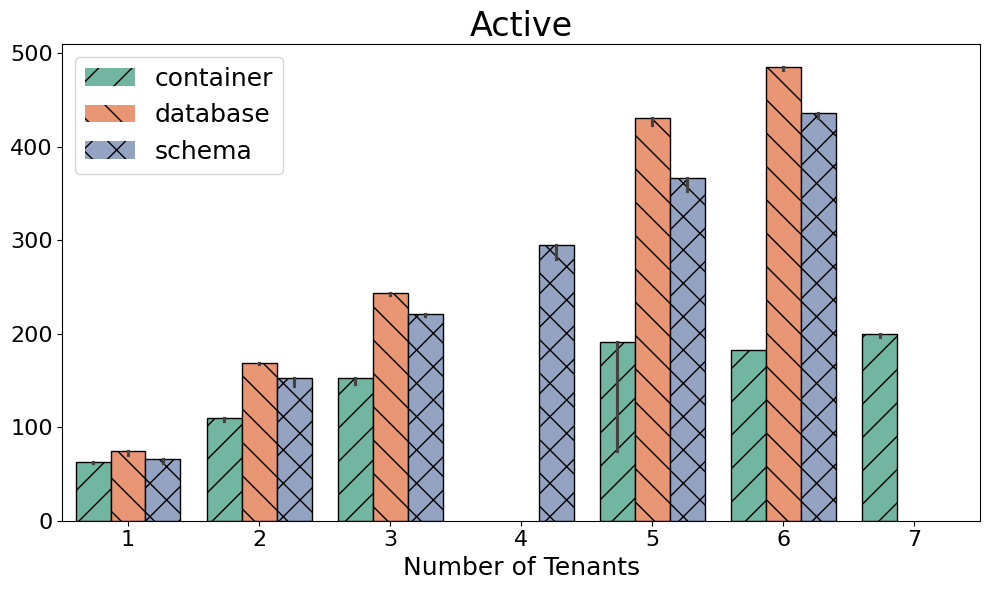

In [20]:
df = df_performance[df_performance['client']=='1']
#df = df_performance.copy()
#plot_boxplots(df, y='Active', title='Active')
plot_bars(df_performance, y='Active', title='Active', estimator='max')

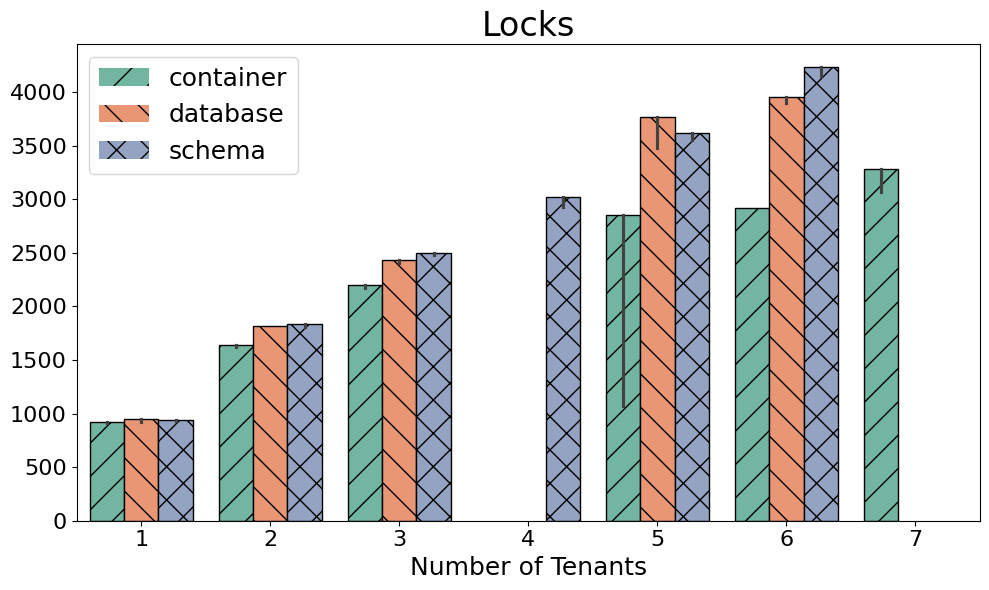

In [21]:
df = df_performance[df_performance['client']=='1']
#df = df_performance.copy()
#plot_boxplots(df, y='Locks', title='Locks')
plot_bars(df_performance, y='Locks', title='Locks', estimator='max')

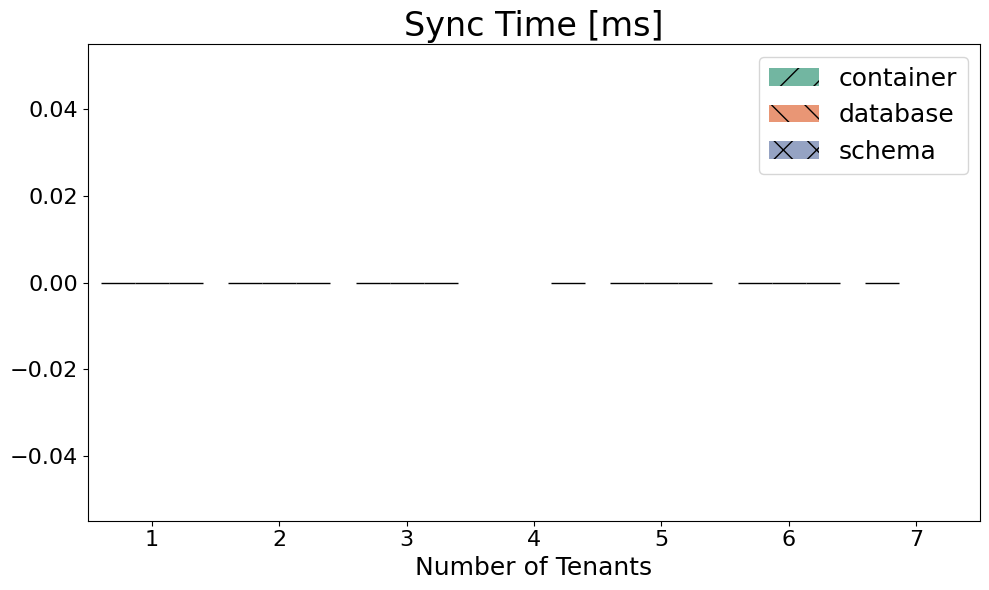

In [22]:
df = df_performance[df_performance['client']=='1']
#df = df_performance.copy()
#plot_boxplots(df, y='Sync Time', title='Sync Time [ms]')
plot_bars(df_performance, y='Sync Time', title='Sync Time [ms]', estimator='max')

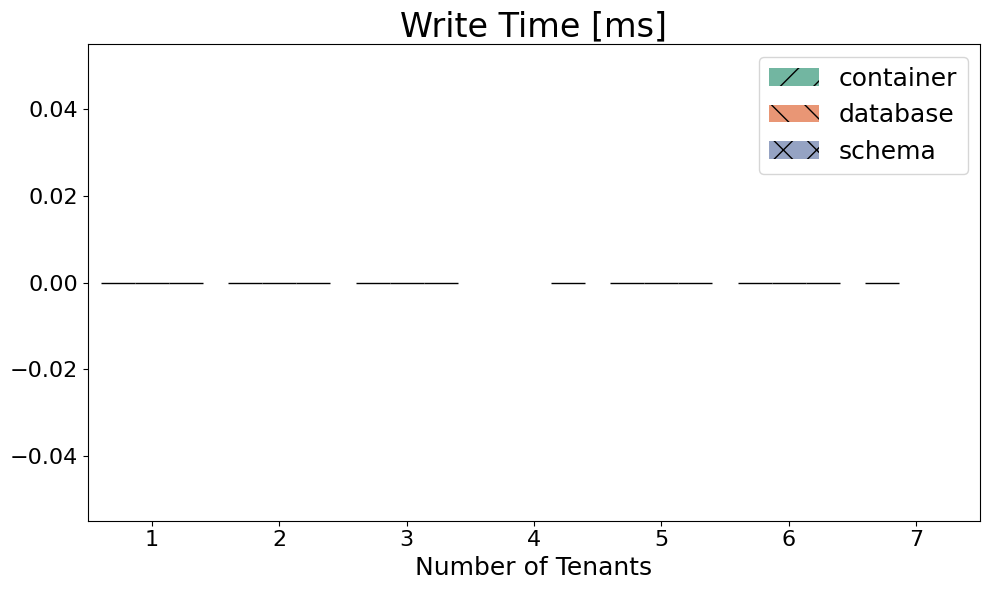

In [23]:
df = df_performance[df_performance['client']=='1']
#df = df_performance.copy()
#plot_boxplots(df, y='Write Time', title='Write Time [ms]')
plot_bars(df_performance, y='Write Time', title='Write Time [ms]', estimator='max')

In [24]:
df_performance = get_performance_all_single(codes)
df_performance

,connection,configuration,experiment_run,client,pod,pod_count,bench,profile,target,time,...,Latency Distribution.Maximum Latency (microseconds),Latency Distribution.Median Latency (microseconds),Latency Distribution.Minimum Latency (microseconds),Latency Distribution.25th Percentile Latency (microseconds),Latency Distribution.90th Percentile Latency (microseconds),Latency Distribution.99th Percentile Latency (microseconds),Latency Distribution.75th Percentile Latency (microseconds),Latency Distribution.Average Latency (microseconds),type,num_tenants
connection_pod,,,,,,,,,,,,,,,,,,,,,
PostgreSQL-1-1-65536-0-1-1,PostgreSQL-1-1-65536-0-1,PostgreSQL-1-1-65536-0,1,1,d6wrn.dbmsbenchmarker,1,tpcc,postgres,65536,600,...,2293943,11878,623,7894,28619,144473,18167,19019,container,1
PostgreSQL-1-1-65536-0-2-1,PostgreSQL-1-1-65536-0-2,PostgreSQL-1-1-65536-0,1,2,gxp62.dbmsbenchmarker,1,tpcc,postgres,65536,600,...,2463699,12011,662,8047,29020,102838,18129,18627,container,1
PostgreSQL-1-1-65536-0-1-1,PostgreSQL-1-1-65536-0-1,PostgreSQL-1-1-65536-0,1,1,5flqd.dbmsbenchmarker,1,tpcc,postgres,65536,600,...,1981391,15496,591,9839,41015,137284,24642,23353,container,2
PostgreSQL-1-1-65536-1-1-1,PostgreSQL-1-1-65536-1-1,PostgreSQL-1-1-65536-1,1,1,c4mbc.dbmsbenchmarker,1,tpcc,postgres,65536,600,...,2782902,15132,658,9574,41218,144201,24298,23297,container,2
PostgreSQL-1-1-65536-0-2-1,PostgreSQL-1-1-65536-0-2,PostgreSQL-1-1-65536-0,1,2,crd76.dbmsbenchmarker,1,tpcc,postgres,65536,600,...,2565636,14383,606,9096,39893,134923,23043,22888,container,2
PostgreSQL-1-1-65536-1-2-1,PostgreSQL-1-1-65536-1-2,PostgreSQL-1-1-65536-1,1,2,2nkrt.dbmsbenchmarker,1,tpcc,postgres,65536,600,...,3366685,14221,642,9001,40043,144304,22813,23173,container,2
PostgreSQL-1-1-65536-0-1-1,PostgreSQL-1-1-65536-0-1,PostgreSQL-1-1-65536-0,1,1,k89s2.dbmsbenchmarker,1,tpcc,postgres,65536,600,...,3008166,19007,685,11569,49919,187715,30484,28841,container,3
PostgreSQL-1-1-65536-1-1-1,PostgreSQL-1-1-65536-1-1,PostgreSQL-1-1-65536-1,1,1,z64d7.dbmsbenchmarker,1,tpcc,postgres,65536,600,...,2329074,20349,655,12406,54200,268896,32587,32698,container,3
PostgreSQL-1-1-65536-2-1-1,PostgreSQL-1-1-65536-2-1,PostgreSQL-1-1-65536-2,1,1,zvdzf.dbmsbenchmarker,1,tpcc,postgres,65536,600,...,2986760,19751,683,11994,52522,193083,31717,30395,container,3


## Per Tenant

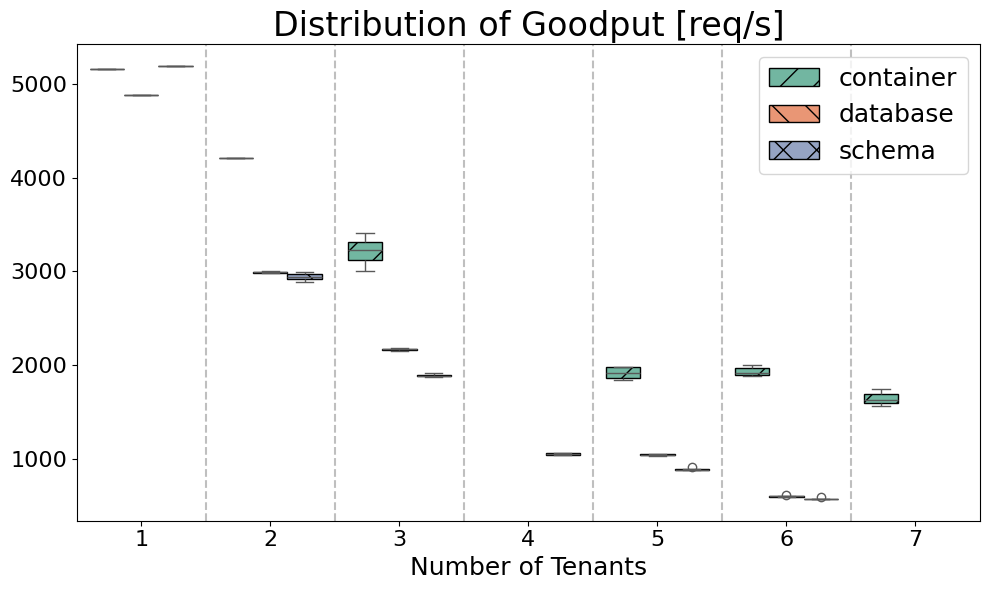

In [25]:
df = df_performance[df_performance['client']=='1']
#df = df_performance.copy()
plot_boxplots(df, y='Goodput (requests/second)', title='Distribution of Goodput [req/s]')

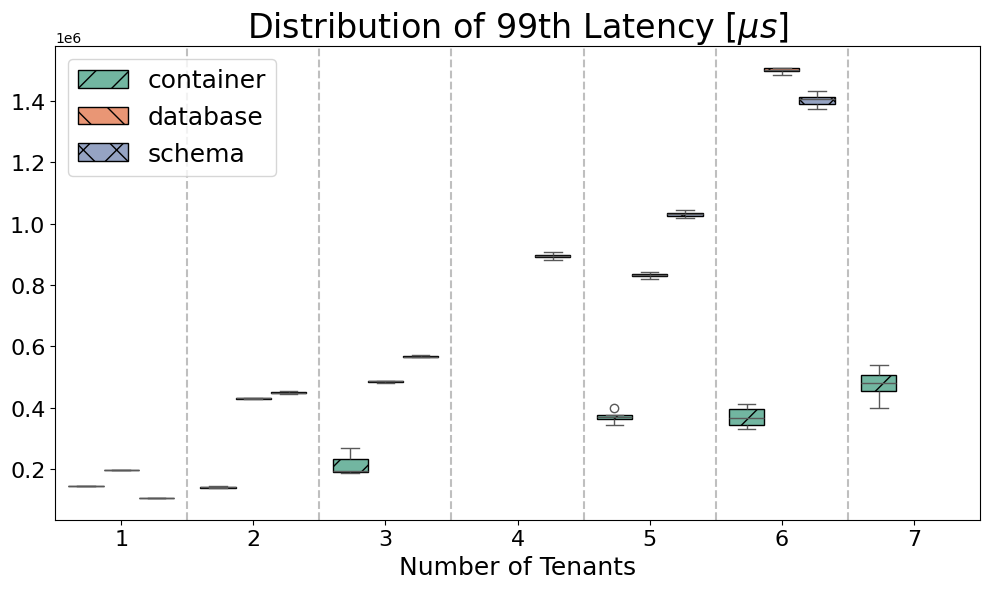

In [26]:
df = df_performance[df_performance['client']=='1']
#df = df_performance.copy()
plot_boxplots(df, y='Latency Distribution.99th Percentile Latency (microseconds)', title='Distribution of 99th Latency [$\mu s$]')


## Per Total

In [27]:
df_performance = get_performance_all(codes)
df_performance

,client,Goodput (requests/second),num_errors,Latency Distribution.Average Latency (microseconds),Latency Distribution.99th Percentile Latency (microseconds),type,num_tenants
0,1,5159.482950,128,19019.000000,144473,container,1
1,2,5267.839948,124,18627.000000,102838,container,1
0,1,8416.451071,229,23325.000000,144201,container,2
1,2,8525.416185,231,23030.500000,144304,container,2
0,1,9632.921254,268,30644.666667,268896,container,3
1,2,9446.006135,251,31169.333333,226923,container,3
0,1,9565.341317,248,51352.800000,397779,container,5
1,2,10631.102771,331,46253.800000,446674,container,5
0,1,11584.422943,330,50860.333333,410775,container,6
1,2,11313.894415,302,52103.666667,460163,container,6


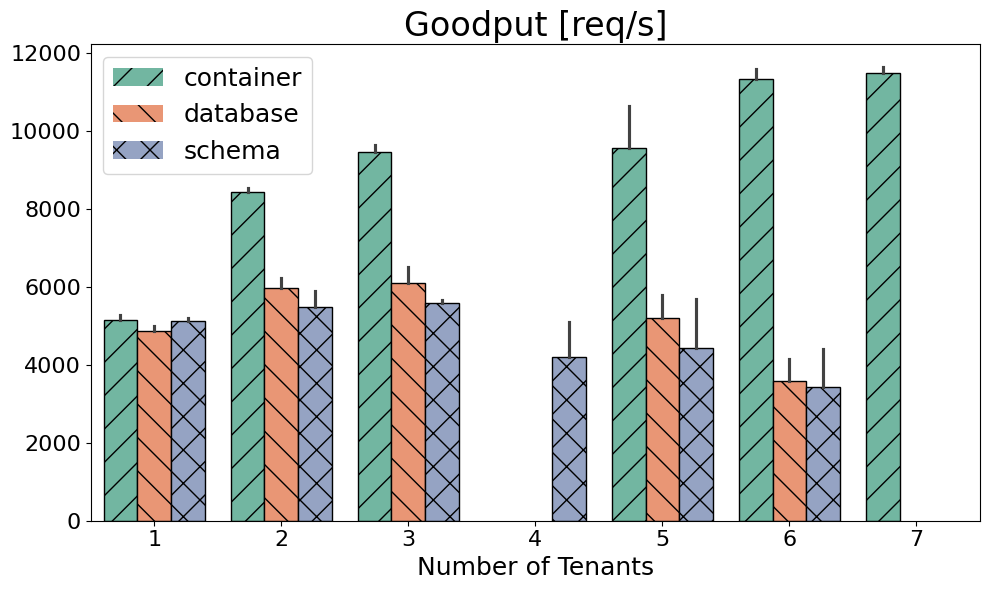

In [28]:
plot_bars(df_performance, y='Goodput (requests/second)', title='Goodput [req/s]', estimator='min')

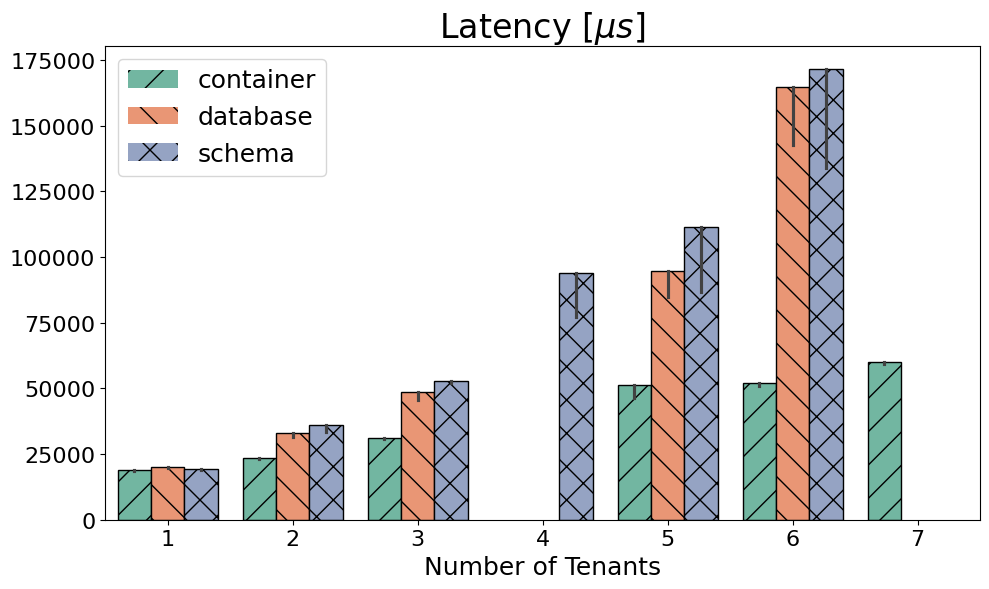

In [29]:
plot_bars(df_performance, y='Latency Distribution.Average Latency (microseconds)', title='Latency [$\mu s$]', estimator='max')

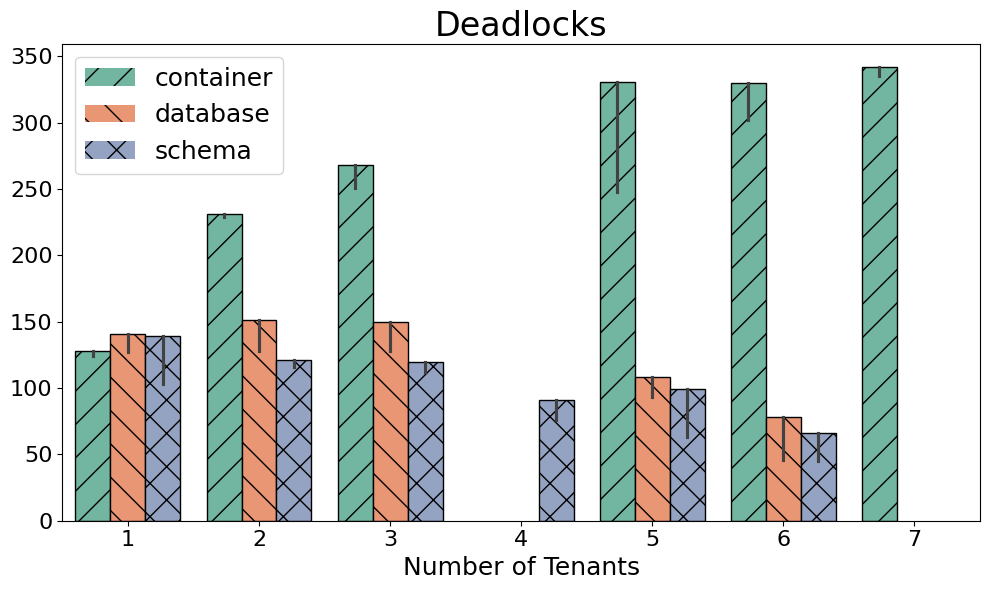

In [30]:
plot_bars(df_performance, y='num_errors', title='Deadlocks', estimator='max')

In [31]:
df_performance = get_loading_time_max_all(codes)
df_performance

,time_load,time_ingest,time_check,terminals,pods,tenant,client,datadisk,type,num_tenants
PostgreSQL-1-1-65536-0-1,358.0,107.0,241.0,1,1,0,1,3056,container,1
PostgreSQL-1-1-65536-0-2,358.0,107.0,241.0,1,1,0,2,6264,container,1
PostgreSQL-1-1-65536-0-1,423.0,125.0,288.0,1,1,0,1,3056,container,2
PostgreSQL-1-1-65536-0-2,423.0,125.0,288.0,1,1,0,2,5335,container,2
PostgreSQL-1-1-65536-1-1,402.0,125.0,268.0,1,1,1,1,3057,container,2
PostgreSQL-1-1-65536-1-2,402.0,125.0,268.0,1,1,1,2,5314,container,2
PostgreSQL-1-1-65536-0-1,534.0,126.0,398.0,1,1,0,1,3056,container,3
PostgreSQL-1-1-65536-0-2,534.0,126.0,398.0,1,1,0,2,4938,container,3
PostgreSQL-1-1-65536-1-1,510.0,127.0,372.0,1,1,1,1,3056,container,3
PostgreSQL-1-1-65536-1-2,510.0,127.0,372.0,1,1,1,2,4722,container,3


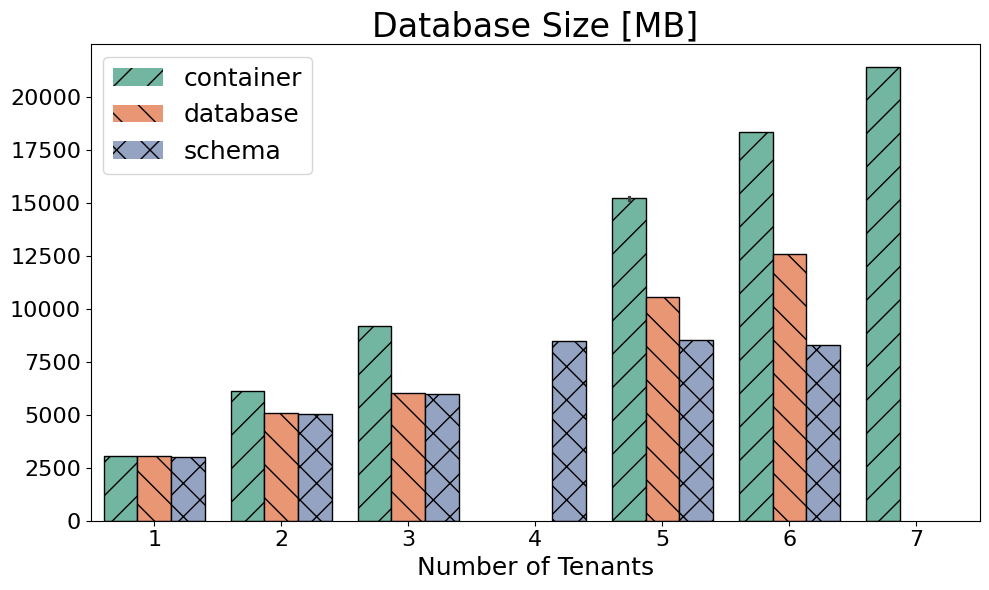

In [32]:
df_performance_first = df_performance[df_performance['client'] == '1']
plot_bars(df_performance_first, y='datadisk', title='Database Size [MB]', estimator='sum')

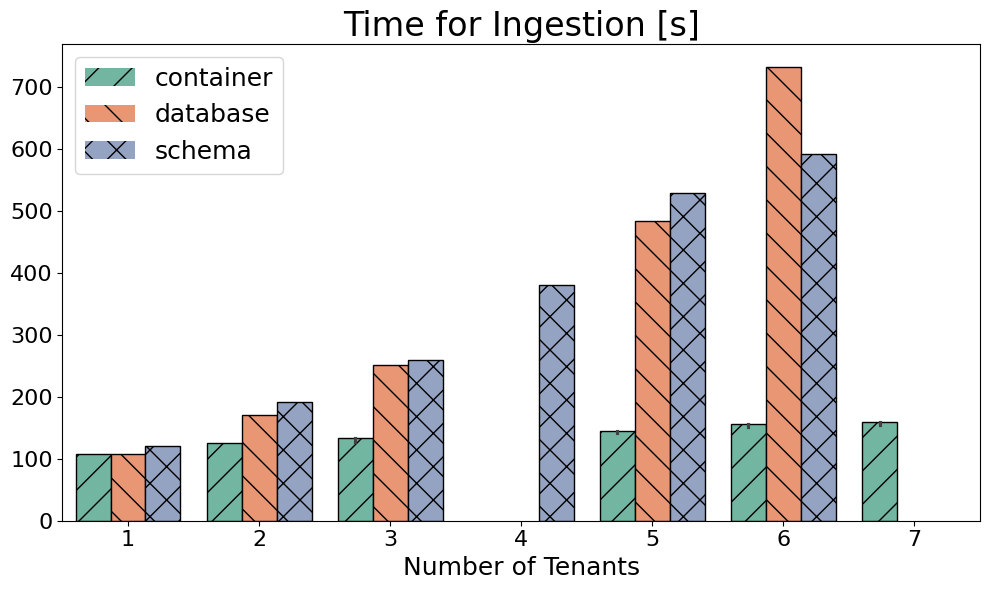

In [33]:
plot_bars(df_performance, y='time_ingest', title='Time for Ingestion [s]', estimator='max')

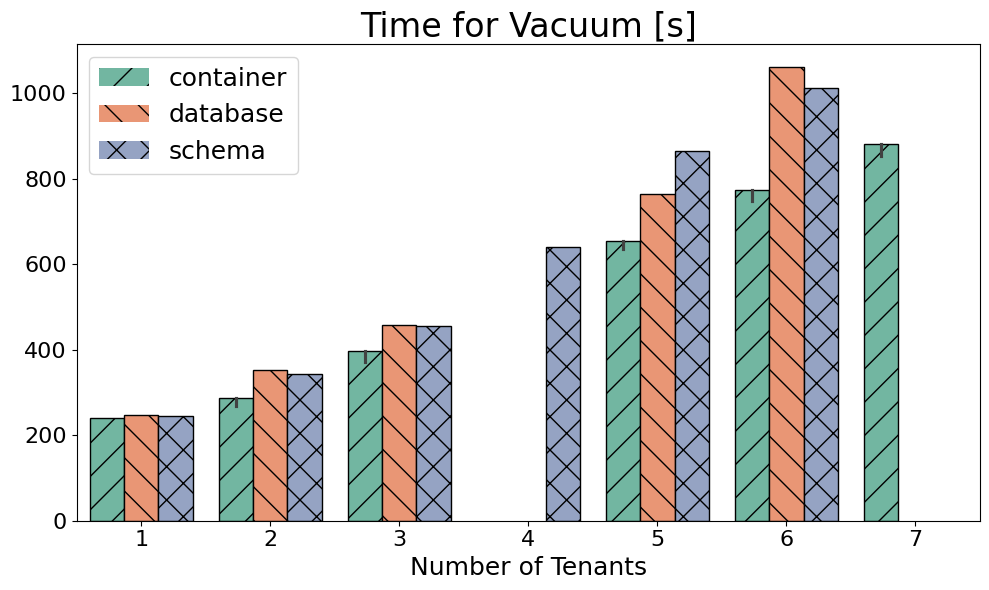

In [34]:
plot_bars(df_performance, y='time_check', title='Time for Vacuum [s]', estimator='max')

## Hardware Benchmarking

In [56]:
df_performance = get_monitoring_stream_all(codes)
df_performance = df_performance[df_performance['client'] == '1']
df_performance

                            Max CPU
PostgreSQL-1-1-65536-0-1  23.011975
PostgreSQL-1-1-65536-0-2  24.232339
                            Max CPU
PostgreSQL-1-1-65536-0-1  19.388809
PostgreSQL-1-1-65536-0-2  21.061515
PostgreSQL-1-1-65536-1-1  19.557225
PostgreSQL-1-1-65536-1-2  19.870060
                            Max CPU
PostgreSQL-1-1-65536-0-1  17.146435
PostgreSQL-1-1-65536-0-2  15.635982
PostgreSQL-1-1-65536-1-1  15.693763
PostgreSQL-1-1-65536-1-2  15.067132
PostgreSQL-1-1-65536-2-1  16.824025
PostgreSQL-1-1-65536-2-2  15.453498
                            Max CPU
PostgreSQL-1-1-65536-0-1  10.284013
PostgreSQL-1-1-65536-0-2  10.800451
PostgreSQL-1-1-65536-1-1  10.438203
PostgreSQL-1-1-65536-1-2  12.385211
PostgreSQL-1-1-65536-2-1  11.530230
PostgreSQL-1-1-65536-2-2  13.484457
PostgreSQL-1-1-65536-3-1  10.669584
PostgreSQL-1-1-65536-3-2  12.500809
PostgreSQL-1-1-65536-4-1  11.580302
PostgreSQL-1-1-65536-4-2  10.935290
                            Max CPU
PostgreSQL-1-1-65536-0-1  10

,client,CPU [CPUs],Max RAM [Gb],Max RAM Cached [Gb],Max CPU,CPU Throttled,Locks,Active,Idle,Transactions Idle,...,Block Reads,Heap Reads,Heap Hits,Sync Time,Write Time,Number Autoanalyze,Number Autovacuum,Cache Hit Ratio [%],type,num_tenants
0,1,13055.38,10.21,22.26,23.01,0.0,916.72,62.95,2.36,27.02,...,74.0,55.0,5.009932e+08,0.0,0.0,15700.0,12500.0,100.000000,container,1
0,1,21667.81,19.49,37.26,19.56,0.0,1625.58,107.19,3.39,51.13,...,85.0,51.0,7.854570e+08,0.0,0.0,29300.0,23000.0,100.000000,container,2
0,1,25990.50,27.55,50.71,17.15,0.0,2174.83,146.01,5.37,68.27,...,146.0,99.0,8.718086e+08,0.0,0.0,43800.0,33400.0,100.000000,container,3
0,1,27396.32,42.60,68.64,11.58,0.0,1072.04,74.76,2.19,29.30,...,2197.0,104.0,8.263166e+08,0.0,0.0,57500.0,45500.0,43.518000,container,5
0,1,33454.85,50.95,80.23,10.49,0.0,2921.74,182.73,7.34,104.23,...,701.0,93.0,1.000308e+09,0.0,0.0,82900.0,62400.0,99.886667,container,6
0,1,34024.28,58.24,90.19,9.46,0.0,3283.61,199.69,8.13,117.91,...,745.0,122.0,9.921362e+08,0.0,0.0,92100.0,70000.0,99.387143,container,7
0,1,11987.80,9.93,21.44,21.24,0.0,922.77,70.53,2.56,28.97,...,53.0,53.0,4.660455e+08,0.0,0.0,15700.0,12100.0,100.000000,database,1
0,1,16345.40,13.88,31.48,31.32,0.0,1822.15,168.13,6.69,46.30,...,47.0,47.0,5.456787e+08,0.0,0.0,28100.0,22700.0,100.000000,database,2
0,1,17252.60,17.28,38.94,35.32,0.0,2435.94,243.92,8.02,66.64,...,55.0,55.0,5.488844e+08,0.0,0.0,39000.0,30200.0,100.000000,database,3
0,1,16086.29,21.97,43.76,37.08,0.0,3764.33,431.21,12.27,59.11,...,70.0,70.0,4.062792e+08,0.0,0.0,57200.0,43700.0,100.000000,database,5


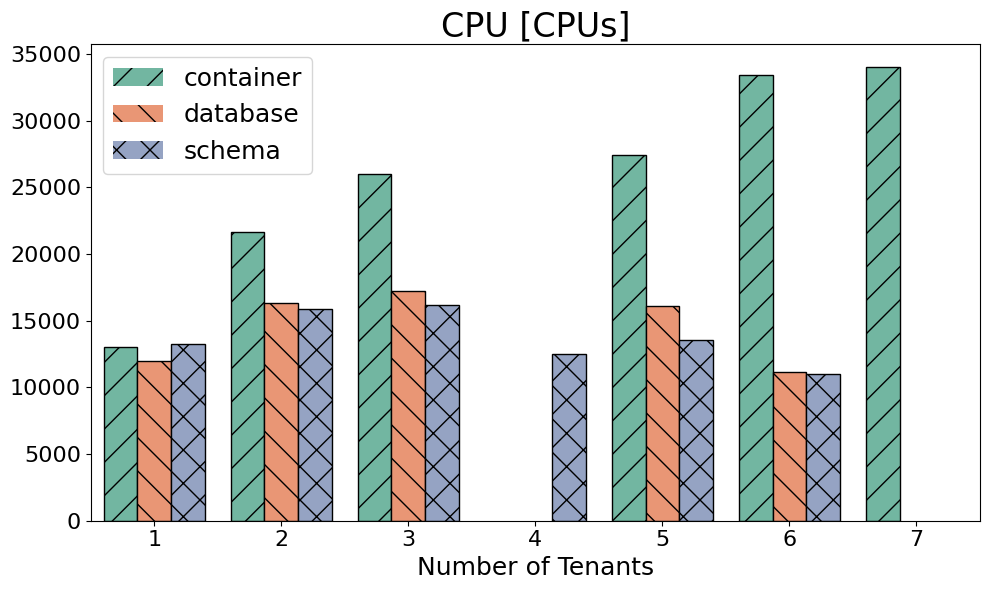

In [36]:
plot_bars(df_performance, y='CPU [CPUs]', title='CPU [CPUs]', estimator='max')

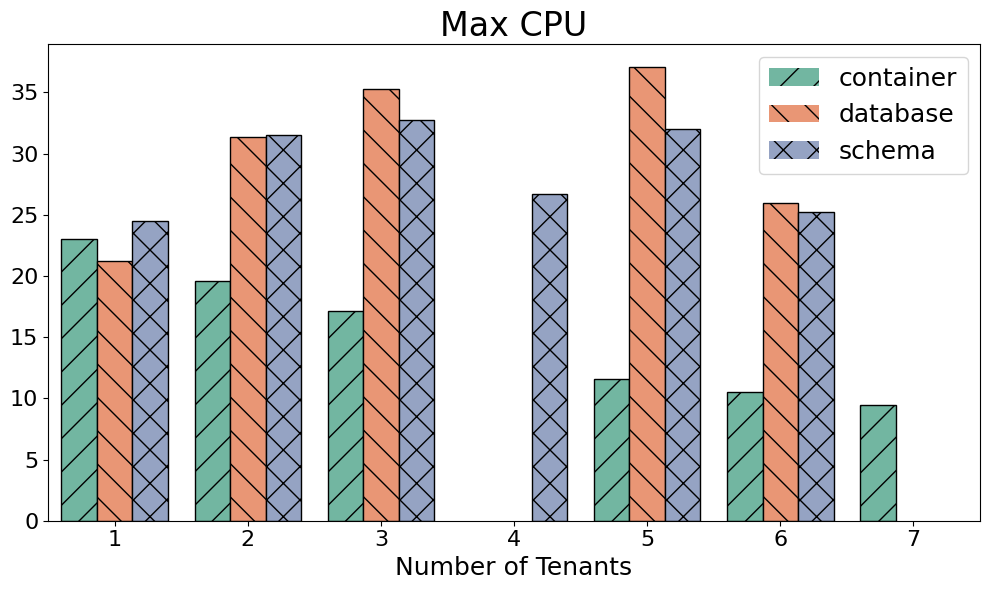

In [37]:
plot_bars(df_performance, y='Max CPU', title='Max CPU', estimator='sum')

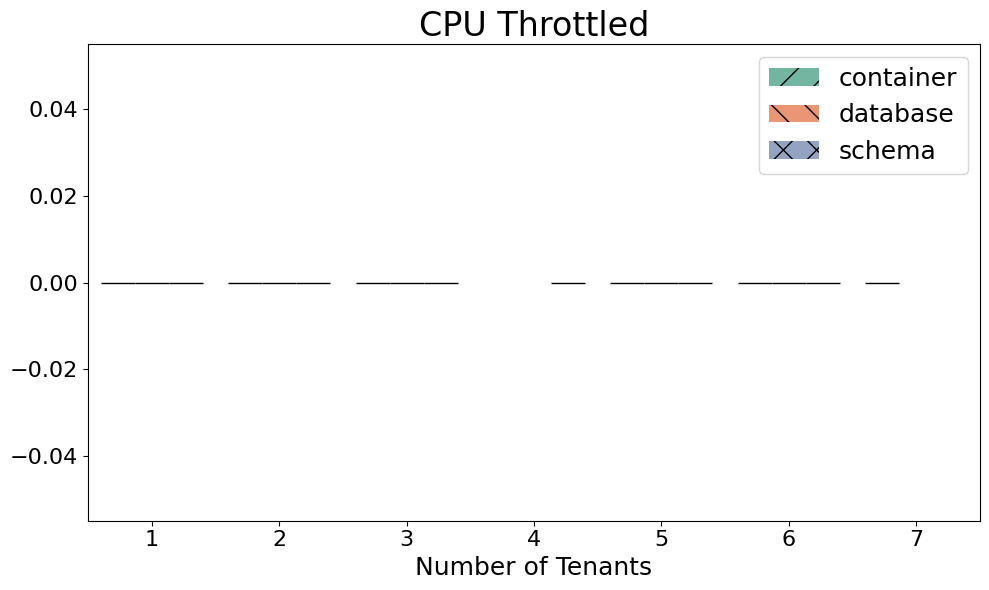

In [38]:
plot_bars(df_performance, y='CPU Throttled', title='CPU Throttled', estimator='sum')

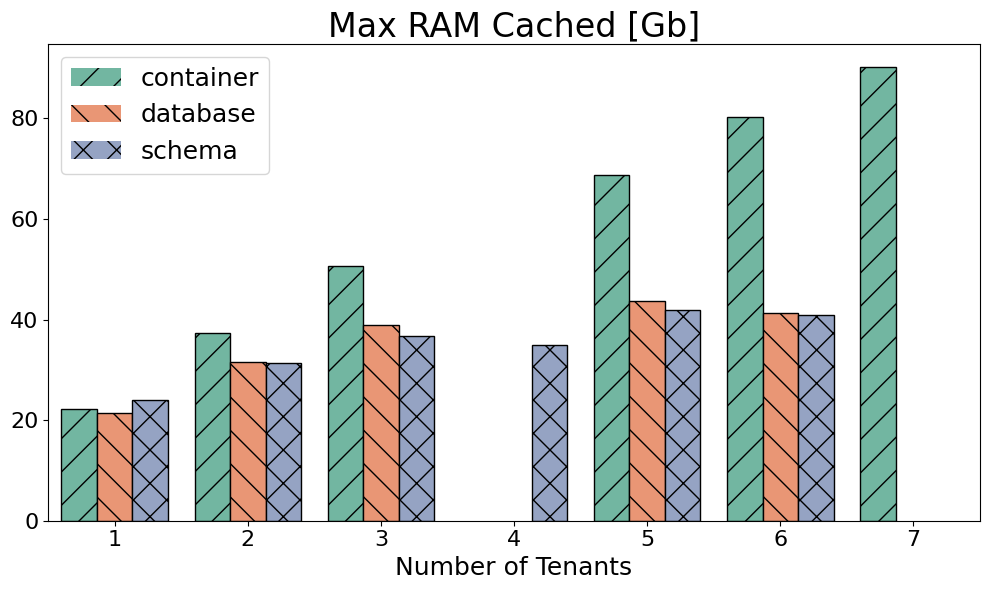

In [39]:
plot_bars(df_performance, y='Max RAM Cached [Gb]', title='Max RAM Cached [Gb]', estimator='sum')

## Hardware Loading

In [40]:
df_performance = get_monitoring_all(codes, "stream")
#df_performance = df_performance[df_performance['client'] == '1']
df_performance

                          CPU Throttled
PostgreSQL-1-1-65536-0-1            0.0
PostgreSQL-1-1-65536-0-2            0.0
                          CPU Throttled
PostgreSQL-1-1-65536-0-1            0.0
PostgreSQL-1-1-65536-0-2            0.0
PostgreSQL-1-1-65536-1-1            0.0
PostgreSQL-1-1-65536-1-2            0.0
                          CPU Throttled
PostgreSQL-1-1-65536-0-1            0.0
PostgreSQL-1-1-65536-0-2            0.0
PostgreSQL-1-1-65536-1-1            0.0
PostgreSQL-1-1-65536-1-2            0.0
PostgreSQL-1-1-65536-2-1            0.0
PostgreSQL-1-1-65536-2-2            0.0
                          CPU Throttled
PostgreSQL-1-1-65536-0-1            0.0
PostgreSQL-1-1-65536-0-2            0.0
PostgreSQL-1-1-65536-1-1            0.0
PostgreSQL-1-1-65536-1-2            0.0
PostgreSQL-1-1-65536-2-1            0.0
PostgreSQL-1-1-65536-2-2            0.0
PostgreSQL-1-1-65536-3-1            0.0
PostgreSQL-1-1-65536-3-2            0.0
PostgreSQL-1-1-65536-4-1            0.0


,client,CPU [CPUs],Max RAM [Gb],Max RAM Cached [Gb],Max CPU,CPU Throttled,Locks,Active,Idle,Transactions Idle,...,Block Reads,Heap Reads,Heap Hits,Sync Time,Write Time,Number Autoanalyze,Number Autovacuum,Cache Hit Ratio [%],type,num_tenants
0,1,13055.38,10.21,22.26,23.01,0.0,916.72,62.95,2.36,27.02,...,74.0,55.0,5.009932e+08,0.0,0.0,15700.0,12500.0,100.000000,container,1
1,2,13088.64,13.36,30.16,24.23,0.0,917.70,61.64,1.52,27.76,...,28.0,28.0,5.152539e+08,0.0,0.0,13200.0,10600.0,100.000000,container,1
0,1,21667.81,19.49,37.26,19.56,0.0,1625.58,107.19,3.39,51.13,...,85.0,51.0,7.854570e+08,0.0,0.0,29300.0,23000.0,100.000000,container,2
1,2,22395.01,24.27,50.72,21.06,0.0,1638.79,109.50,2.81,49.08,...,48.0,48.0,8.065245e+08,0.0,0.0,26200.0,20500.0,100.000000,container,2
0,1,25990.50,27.55,50.71,17.15,0.0,2174.83,146.01,5.37,68.27,...,146.0,99.0,8.718086e+08,0.0,0.0,43800.0,33400.0,100.000000,container,3
1,2,26070.12,33.04,62.63,15.64,0.0,2199.91,152.65,4.41,61.50,...,65.0,65.0,9.246232e+08,0.0,0.0,37200.0,29200.0,100.000000,container,3
0,1,27396.32,42.60,68.64,11.58,0.0,1072.04,74.76,2.19,29.30,...,2197.0,104.0,8.263166e+08,0.0,0.0,57500.0,45500.0,43.518000,container,5
1,2,29701.19,48.34,81.50,13.48,0.0,2853.35,191.43,8.38,87.28,...,1206.0,156.0,1.298300e+09,0.0,0.0,88900.0,69700.0,99.590000,container,5
0,1,33454.85,50.95,80.23,10.49,0.0,2921.74,182.73,7.34,104.23,...,701.0,93.0,1.000308e+09,0.0,0.0,82900.0,62400.0,99.886667,container,6
1,2,32525.87,56.94,93.92,10.13,0.0,2922.61,182.27,7.01,97.70,...,608.0,85.0,1.132111e+09,0.0,0.0,85500.0,65100.0,99.890000,container,6


In [41]:
#plot_bars(df_performance, y='CPU [CPUs]', title='CPU [CPUs]', estimator='max')

In [42]:
#plot_bars(df_performance, y='Max CPU', title='Max CPU', estimator='sum')

In [43]:
#plot_bars(df_performance, y='Max RAM Cached [Gb]', title='Max RAM Cached [Gb]', estimator='sum')

# Efficiency

In [44]:
client = '1'

df_performance_monitoring = get_monitoring_stream_all(codes)
df_performance_monitoring = df_performance_monitoring[df_performance_monitoring['client'] == client]
df_performance = get_performance_all(codes)
df_performance = df_performance[df_performance['client'] == client]
merged_df = pd.merge(df_performance, df_performance_monitoring, on=['type', 'num_tenants'], how='inner')
#merged_df['I_Lat'] = 1./merged_df['E_Lat']
merged_df['E_Tpx'] = merged_df['Goodput (requests/second)'] / merged_df['CPU [CPUs]'] * 600.
merged_df['E_Lat'] = 1./np.sqrt(merged_df['Latency Distribution.Average Latency (microseconds)']*merged_df['CPU [CPUs]']/1E6)
merged_df['E_RAM'] = (merged_df['Goodput (requests/second)']) / merged_df['Max RAM [Gb]']
merged_df

                          CPU Throttled
PostgreSQL-1-1-65536-0-1            0.0
PostgreSQL-1-1-65536-0-2            0.0
                          CPU Throttled
PostgreSQL-1-1-65536-0-1            0.0
PostgreSQL-1-1-65536-0-2            0.0
PostgreSQL-1-1-65536-1-1            0.0
PostgreSQL-1-1-65536-1-2            0.0
                          CPU Throttled
PostgreSQL-1-1-65536-0-1            0.0
PostgreSQL-1-1-65536-0-2            0.0
PostgreSQL-1-1-65536-1-1            0.0
PostgreSQL-1-1-65536-1-2            0.0
PostgreSQL-1-1-65536-2-1            0.0
PostgreSQL-1-1-65536-2-2            0.0
                          CPU Throttled
PostgreSQL-1-1-65536-0-1            0.0
PostgreSQL-1-1-65536-0-2            0.0
PostgreSQL-1-1-65536-1-1            0.0
PostgreSQL-1-1-65536-1-2            0.0
PostgreSQL-1-1-65536-2-1            0.0
PostgreSQL-1-1-65536-2-2            0.0
PostgreSQL-1-1-65536-3-1            0.0
PostgreSQL-1-1-65536-3-2            0.0
PostgreSQL-1-1-65536-4-1            0.0


,client_x,Goodput (requests/second),num_errors,Latency Distribution.Average Latency (microseconds),Latency Distribution.99th Percentile Latency (microseconds),type,num_tenants,client_y,CPU [CPUs],Max RAM [Gb],...,Heap Reads,Heap Hits,Sync Time,Write Time,Number Autoanalyze,Number Autovacuum,Cache Hit Ratio [%],E_Tpx,E_Lat,E_RAM
0,1,5159.482950,128,19019.000000,144473,container,1,1,13055.38,10.21,...,55.0,5.009932e+08,0.0,0.0,15700.0,12500.0,100.000000,237.119852,0.063462,505.336234
1,1,8416.451071,229,23325.000000,144201,container,2,1,21667.81,19.49,...,51.0,7.854570e+08,0.0,0.0,29300.0,23000.0,100.000000,233.058654,0.044482,431.834329
2,1,9632.921254,268,30644.666667,268896,container,3,1,25990.50,27.55,...,99.0,8.718086e+08,0.0,0.0,43800.0,33400.0,100.000000,222.379437,0.035434,349.652314
3,1,9565.341317,248,51352.800000,397779,container,5,1,27396.32,42.60,...,104.0,8.263166e+08,0.0,0.0,57500.0,45500.0,43.518000,209.488164,0.026661,224.538529
4,1,11584.422943,330,50860.333333,410775,container,6,1,33454.85,50.95,...,93.0,1.000308e+09,0.0,0.0,82900.0,62400.0,99.886667,207.762216,0.024243,227.368458
5,1,11484.329279,342,59905.714286,540072,container,7,1,34024.28,58.24,...,122.0,9.921362e+08,0.0,0.0,92100.0,70000.0,99.387143,202.520011,0.022150,197.189720
6,1,4875.852940,127,20135.000000,197024,database,1,1,11987.80,9.93,...,53.0,4.660455e+08,0.0,0.0,15700.0,12100.0,100.000000,244.040755,0.064366,491.022451
7,1,5977.118006,151,32872.500000,431486,database,2,1,16345.40,13.88,...,47.0,5.456787e+08,0.0,0.0,28100.0,22700.0,100.000000,219.405509,0.043141,430.628098
8,1,6492.916426,150,45421.666667,487842,database,3,1,17252.60,17.28,...,55.0,5.488844e+08,0.0,0.0,39000.0,30200.0,100.000000,225.806537,0.035722,375.747478
9,1,5198.378110,93,94624.800000,841455,database,5,1,16086.29,21.97,...,70.0,4.062792e+08,0.0,0.0,57200.0,43700.0,100.000000,193.893487,0.025631,236.612568


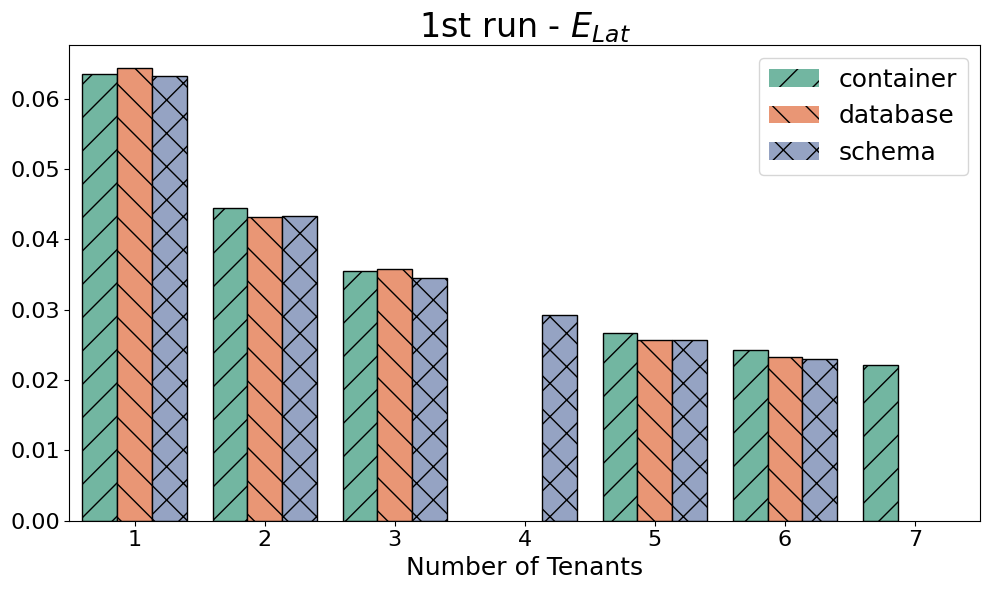

In [45]:
plot_bars(merged_df, y='E_Lat', title='1st run - $E_{Lat}$', estimator='max')

In [46]:
#plot_bars(merged_df, y='I_Lat', title='1st run - $I_{Lat}$', estimator='max')

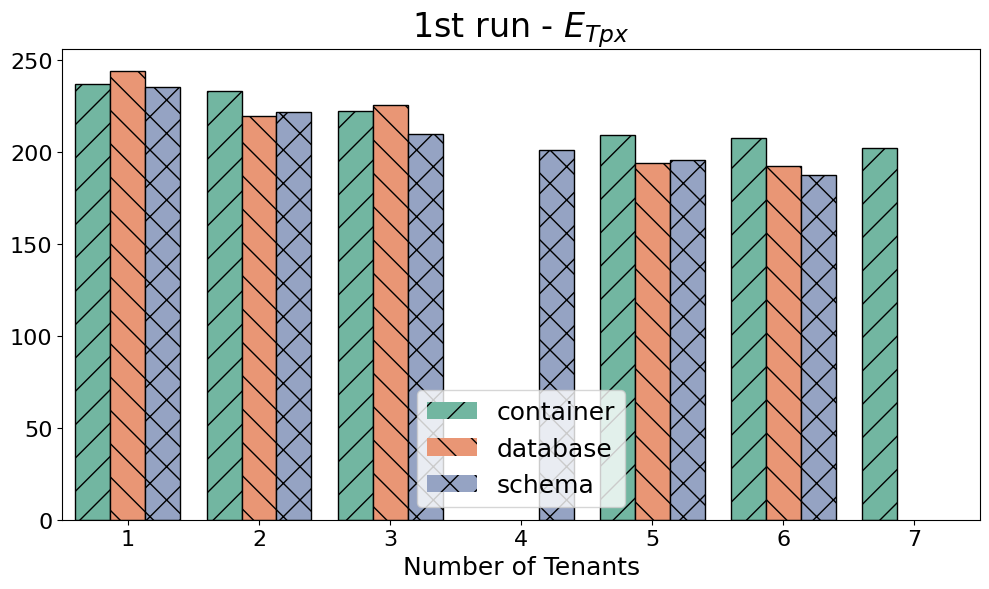

In [47]:
plot_bars(merged_df, y='E_Tpx', title='1st run - $E_{Tpx}$', estimator='max')

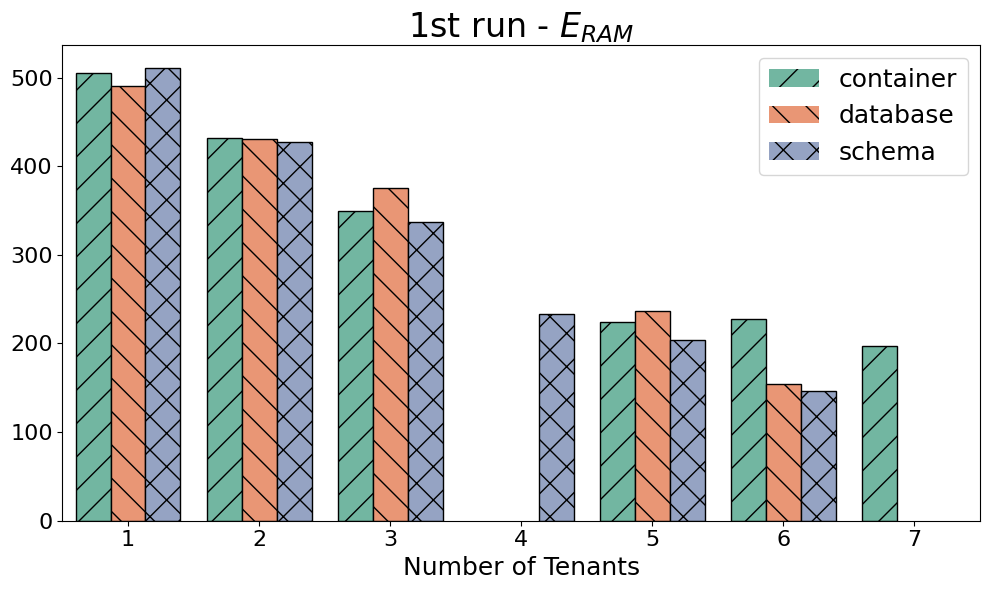

In [48]:
plot_bars(merged_df, y='E_RAM', title='1st run - $E_{RAM}$', estimator='min')

In [49]:
client = '2'

df_performance_monitoring = get_monitoring_stream_all(codes)
df_performance_monitoring = df_performance_monitoring[df_performance_monitoring['client'] == client]
df_performance = get_performance_all(codes)
df_performance = df_performance[df_performance['client'] == client]
merged_df = pd.merge(df_performance, df_performance_monitoring, on=['type', 'num_tenants'], how='inner')
#merged_df['CPUs/Request'] = merged_df['CPU [CPUs]'] / merged_df['Goodput (requests/second)'] / 600.
merged_df['E_Tpx'] = merged_df['Goodput (requests/second)'] / merged_df['CPU [CPUs]'] * 600.
merged_df['E_Lat'] = 1./np.sqrt(merged_df['Latency Distribution.Average Latency (microseconds)']*merged_df['CPU [CPUs]']/1E6)
merged_df['E_RAM'] = (merged_df['Goodput (requests/second)']) / merged_df['Max RAM [Gb]']

merged_df

                          CPU Throttled
PostgreSQL-1-1-65536-0-1            0.0
PostgreSQL-1-1-65536-0-2            0.0
                          CPU Throttled
PostgreSQL-1-1-65536-0-1            0.0
PostgreSQL-1-1-65536-0-2            0.0
PostgreSQL-1-1-65536-1-1            0.0
PostgreSQL-1-1-65536-1-2            0.0
                          CPU Throttled
PostgreSQL-1-1-65536-0-1            0.0
PostgreSQL-1-1-65536-0-2            0.0
PostgreSQL-1-1-65536-1-1            0.0
PostgreSQL-1-1-65536-1-2            0.0
PostgreSQL-1-1-65536-2-1            0.0
PostgreSQL-1-1-65536-2-2            0.0
                          CPU Throttled
PostgreSQL-1-1-65536-0-1            0.0
PostgreSQL-1-1-65536-0-2            0.0
PostgreSQL-1-1-65536-1-1            0.0
PostgreSQL-1-1-65536-1-2            0.0
PostgreSQL-1-1-65536-2-1            0.0
PostgreSQL-1-1-65536-2-2            0.0
PostgreSQL-1-1-65536-3-1            0.0
PostgreSQL-1-1-65536-3-2            0.0
PostgreSQL-1-1-65536-4-1            0.0


,client_x,Goodput (requests/second),num_errors,Latency Distribution.Average Latency (microseconds),Latency Distribution.99th Percentile Latency (microseconds),type,num_tenants,client_y,CPU [CPUs],Max RAM [Gb],...,Heap Reads,Heap Hits,Sync Time,Write Time,Number Autoanalyze,Number Autovacuum,Cache Hit Ratio [%],E_Tpx,E_Lat,E_RAM
0,2,5267.839948,124,18627.000000,102838,container,1,2,13088.64,13.36,...,28.0,5.152539e+08,0.0,0.0,13200.0,10600.0,100.000000,241.484522,0.064044,394.299397
1,2,8525.416185,231,23030.500000,144304,container,2,2,22395.01,24.27,...,48.0,8.065245e+08,0.0,0.0,26200.0,20500.0,100.000000,228.410245,0.044032,351.273844
2,2,9446.006135,251,31169.333333,226923,container,3,2,26070.12,33.04,...,65.0,9.246232e+08,0.0,0.0,37200.0,29200.0,100.000000,217.398450,0.035080,285.896069
3,2,10631.102771,331,46253.800000,446674,container,5,2,29701.19,48.34,...,156.0,1.298300e+09,0.0,0.0,88900.0,69700.0,99.590000,214.761148,0.026980,219.923516
4,2,11313.894415,302,52103.666667,460163,container,6,2,32525.87,56.94,...,85.0,1.132111e+09,0.0,0.0,85500.0,65100.0,99.890000,208.705767,0.024291,198.698532
5,2,11633.411075,335,59165.000000,553167,container,7,2,34204.40,64.53,...,101396.0,1.138874e+09,0.0,0.0,96300.0,74600.0,99.837143,204.068677,0.022229,180.279112
6,2,4989.564744,141,19669.000000,203329,database,1,2,12253.09,13.06,...,21.0,4.685522e+08,0.0,0.0,12700.0,10900.0,100.000000,244.325215,0.064415,382.049368
7,2,6225.592853,128,31559.000000,402295,database,2,2,16648.30,17.97,...,86.0,1.195656e+09,0.0,0.0,56300.0,46400.0,100.000000,224.368597,0.043627,346.443676
8,2,6084.628126,128,48456.666667,536623,database,3,2,16458.85,20.92,...,54.0,5.065850e+08,0.0,0.0,33600.0,27400.0,100.000000,221.812391,0.035410,290.852205
9,2,5782.366285,108,84974.600000,787175,database,5,2,17277.08,26.52,...,39.0,4.629724e+08,0.0,0.0,51300.0,40800.0,100.000000,200.810540,0.026099,218.037944


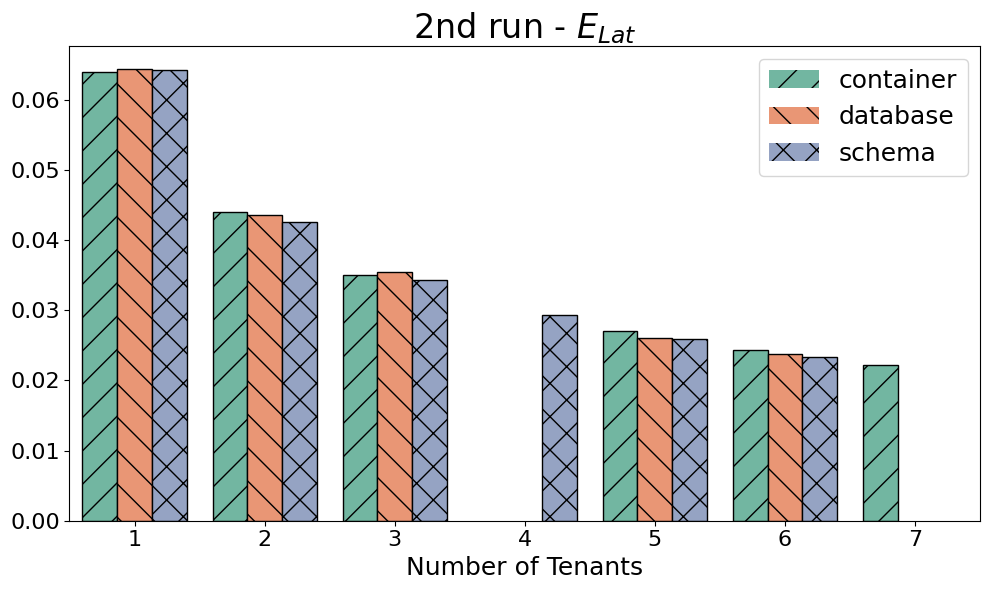

In [50]:
plot_bars(merged_df, y='E_Lat', title='2nd run - $E_{Lat}$', estimator='max')

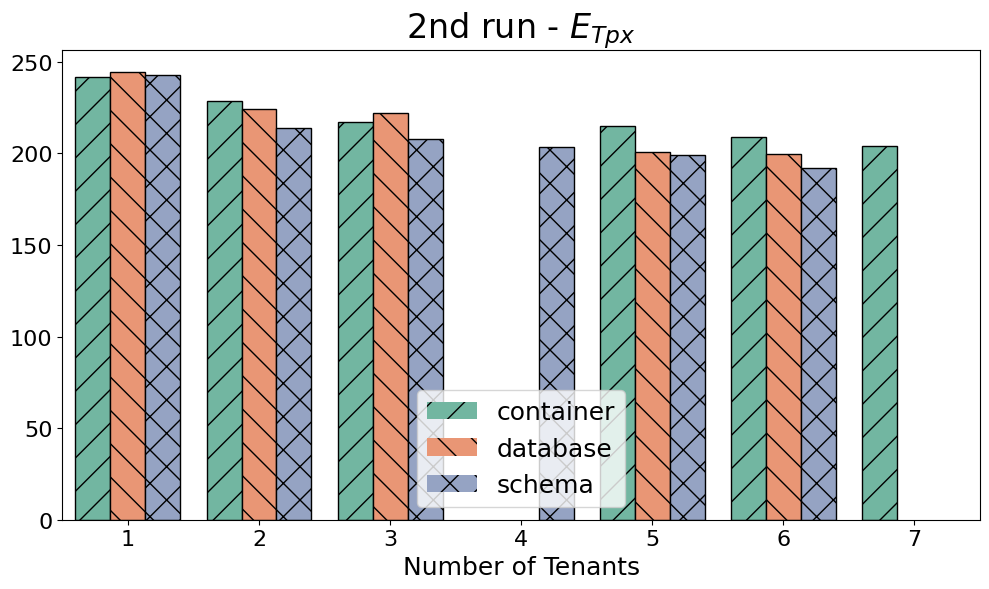

In [51]:
plot_bars(merged_df, y='E_Tpx', title='2nd run - $E_{Tpx}$', estimator='max')

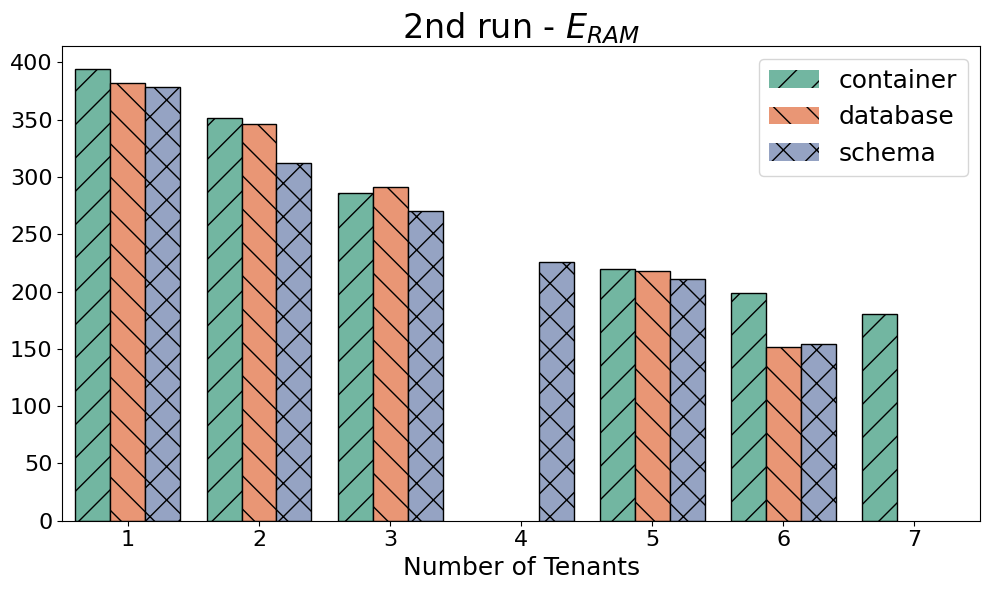

In [52]:
plot_bars(merged_df, y='E_RAM', title='2nd run - $E_{RAM}$', estimator='max')

In [53]:
import os
import zipfile

def zip_all_results():
    # Set the base directory containing the folders
    base_dir = path # "/path/to/your/folders"  # CHANGE THIS to your actual directory
    # List all folder names in the directory
    folder_names = codes
    # Create a zip for each folder
    for folder in folder_names:
        folder_path = os.path.join(base_dir, folder)
        zip_path = os.path.join(base_dir, f"{folder}.zip")
        print(f"Zipping {folder_path} to {zip_path}...")
        with zipfile.ZipFile(zip_path, 'w', zipfile.ZIP_DEFLATED) as zipf:
            for root, _, files in os.walk(folder_path):
                for file in files:
                    abs_path = os.path.join(root, file)
                    rel_path = os.path.relpath(abs_path, folder_path)
                    zipf.write(abs_path, arcname=os.path.join(folder, rel_path))
    print("✅ Done zipping all folders.")


In [54]:
#zip_all_results()